# PROJECT EXPECTATIONS

"Download the dataset from your dataset URL

Read the external sources for the dataset to understand the schema and data.

Create a database to store the data.(SQL or NoSQL)

Insert the data into the database. (SQL or NoSQL)

Connect to the database using Python and retrieve the data from the tables (SQL or NoSQL).

Save the data into pandas(or else) dataframe.

Perform exploratory data analysis (EDA) on the data to understand the distribution, trends, and relationships( not limited to you can vary) among variables.

Visualize the data using matplotlib or seaborn(or with different libs).

Apply data analysis techniques like sentiment analysis, topic modeling, or network analysis(or different approaches which fit your dataset) to draw insights.

Write the results back to the database.

Present your project.

Write your project report and submit it."


# About the Dataset

The dataset used for this analysis was downloaded from data.world. it contains 23123 rows and 11 columns. The dataset is all about review for Amazon Uk shoes review by various customers from countries. The aim is to help Amazon understand the habit of it customers towards shoes purchase to help them improve their services that meet their customer requirement and also to help the producer of such shoes understand customer reactions towards pro

<h1> STEP 1: Download the dataset from your dataset URL</h1>

In [1]:
!wget https://data.world/crawlfeeds/amazon-uk-shoes-product-reviews-dataset/file/amazon_uk_shoes_products_dataset_2021_12.csv

Connecting to data.world (151.101.194.133:443)
wget: note: TLS certificate validation not implemented
wget: can't open 'amazon_uk_shoes_products_dataset_2021_12.csv': File exists


<h3> IMPORT THE LIBARIES</h3>

In [2]:
import seaborn as sns
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action ='ignore', category =FutureWarning)
import pandas as pd

<H1> STEP 2: Connect to the database using Python.</H1>

create the database file

In [3]:
from pathlib import Path
Path('shoes_review.db').touch()

In [4]:
conn = sqlite3.connect('shoes_review.db')
c = conn.cursor()

<H1>STEP 3: Create SQL database to store the data.</H1>

understand the dataset structure for databse insertion

In [5]:
amazon_shoes_review = pd.read_csv('/storage/emulated/0/db_pro/shoes.csv')
amazon_shoes_review.head(3)

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,2021-12-24T02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,2021-12-24T02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,2021-12-24T02:26:25


In [6]:
c.execute ('''drop table if exists shoes_reviews''')

In [7]:
c.execute('''create table shoes_reviews(uniq_id varchar primary key unique not null, url varchar, product_name varchar, reviewer_name varchar, review_title text,
             review_text varchar, review_rating float, verified_purchase boolean, review_date date, helpful_count varchar,scrapt_date datetime  )''')
amazon_shoes_review = pd.read_csv('/storage/emulated/0/db_pro/shoes.csv')
amazon_shoes_review.to_sql('shoes_review', conn, if_exists ='append', index = False)
conn.commit()

<H1>STEP4: Read the external sources for the dataset to understand the schema and data.</H1>

In [8]:
pd.read_sql_query("select * from sqlite_master where type = 'table';",conn)

,type,name,tbl_name,rootpage,sql
0,table,shoes_review,shoes_review,4,"CREATE TABLE ""shoes_review"" (\n""url"" TEXT,\n ..."
1,table,shoes_reviews,shoes_reviews,2,CREATE TABLE shoes_reviews(uniq_id varchar pri...


View database data types

In [9]:
c.execute("pragma table_info(shoes_review)").fetchall()

[(0, 'url', 'TEXT', 0, None, 0),
 (1, 'product_name', 'TEXT', 0, None, 0),
 (2, 'reviewer_name', 'TEXT', 0, None, 0),
 (3, 'review_title', 'TEXT', 0, None, 0),
 (4, 'review_text', 'TEXT', 0, None, 0),
 (5, 'review_rating', 'REAL', 0, None, 0),
 (6, 'verified_purchase', 'INTEGER', 0, None, 0),
 (7, 'review_date', 'TEXT', 0, None, 0),
 (8, 'helpful_count', 'TEXT', 0, None, 0),
 (9, 'uniq_id', 'TEXT', 0, None, 0),
 (10, 'scraped_at', 'TEXT', 0, None, 0)]

In [10]:
%load_ext sql
%sql sqlite:////storage/emulated/0/db_pro/shoes_review.db

In [11]:
%%sql
select *
from shoes_review
limit 5

 * sqlite:////storage/emulated/0/db_pro/shoes_review.db
Done.


url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
https://www.amazon.co.uk/dp/B07SBX32T5,"Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK",Jocelyn McSayles,Love em,Love these. Was looking for converses and these were half the price and so unique— I’ve never seen clear shoes like these; they fit great. The plastic takes a little getting used to but the style is so worth it.,5.0,1,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,2021-12-24T02:26:25
https://www.amazon.co.uk/dp/B07SBX32T5,"Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK",Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day of wearing them the tongue started ripping. After the 3rd day of wearing them the plastic on the side ripped. They could have ripped bc I was wearing them to work and I do a lot of walking at work. If you’re going to buy these I don’t recommend wearing them on days where you will do a lot of walking or they might rip",2.0,1,Reviewed in the United States on 28 October 2021,None,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,2021-12-24T02:26:25
https://www.amazon.co.uk/dp/B07SBX32T5,"Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK",Chris Souza,Good quality,Good quality,5.0,1,Reviewed in the United States on 20 January 2021,None,db5a7525-d40b-5265-84d8-df4f29837a3b,2021-12-24T02:26:25
https://www.amazon.co.uk/dp/B07SBX32T5,"Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK",Amazon Customer,Good,Great,5.0,1,Reviewed in the United States on 22 April 2021,None,75a42851-6462-54b5-988a-27d336221943,2021-12-24T02:26:25
https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,"Ho scelto il modello bianco con rifinitura dietro nera e posso dire che da vicino le scarpe sono ancora più belle, il mio numero è 38, 38.5 ed ho ordinato il numero 38 e mi va bene..Spedizione veloce, il pacco è arrivato anche prima del previsto, prezzo ottimo dato che in giro costano almeno 10, 15 euro in più.",5.0,1,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,2021-12-24T02:26:25


In [12]:
%%sql 
select  count(*) as [Total Rows]
from shoes_review

 * sqlite:////storage/emulated/0/db_pro/shoes_review.db
Done.


Total Rows
238805


In [13]:
shoes = pd.read_sql("select count(*) as [Total Rows] from shoes_review",conn)
shoes.head

<bound method NDFrame.head of    Total Rows
0      238805>

In [14]:
type(shoes)

pandas.core.frame.DataFrame

display total rowz

In [15]:
%%sql
select *,count() as [Total Rows]
from shoes_review 

 * sqlite:////storage/emulated/0/db_pro/shoes_review.db
Done.


url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at,Total Rows
https://www.amazon.co.uk/dp/B07SBX32T5,"Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK",Jocelyn McSayles,Love em,Love these. Was looking for converses and these were half the price and so unique— I’ve never seen clear shoes like these; they fit great. The plastic takes a little getting used to but the style is so worth it.,5.0,1,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,2021-12-24T02:26:25,238805


<h1>STEP 5: Retrieve the data from the SQL tables</h1>

In [16]:
c.execute('''select *
from shoes_review
limit 5''')
c.fetchall()

[('https://www.amazon.co.uk/dp/B07SBX32T5',
  "Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK",
  'Jocelyn McSayles',
  'Love em',
  'Love these. Was looking for converses and these were half the price and so unique— I’ve never seen clear shoes like these; they fit great. The plastic takes a little getting used to but the style is so worth it.',
  5.0,
  1,
  'Reviewed in the United States on 2 June 2020',
  '2 people found this helpful',
  '36eae4e5-2894-5279-a0b7-d2b330e2b814',
  '2021-12-24T02:26:25'),
 ('https://www.amazon.co.uk/dp/B07SBX32T5',
  "Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK",
  'Kenia Rivera',
  'The plastic ripped',
  'The shoes are very cute, but after the 2nd day of wearing them the tongue started ripping. After the 3rd day of wearing them the plastic on the side ripped. They could have ripped bc I was wearing them to work and I do a lot of walking at work. If you’re going to buy these I don’t recommend wearing them on days w

In [17]:
ukshoes = pd.read_sql("select * from shoes_review", conn)

In [18]:
ukshoes.head(2)

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,1,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,2021-12-24T02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,1,Reviewed in the United States on 28 October 2021,None,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,2021-12-24T02:26:25


<h1>STEP 6: Save the data into pandas(or else) dataframe.</h1>

In [19]:
shoesCsv = ukshoes.to_csv(r"uk_shoes_review.csv",index = False)

<H1>STEP 7: Perform exploratory data analysis (EDA) on the data to understand the distribution, trends, and relationships( not limited to you can vary) among variables.</H1>

Reading the dataframe

In [20]:
amzReview = pd.read_csv('uk_shoes_review.csv',low_memory=False)

In [21]:
amzReview.sample(10)

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
97965,https://www.amazon.co.uk/dp/B084XQRM4V,"ARA Women's Lissabon Sneaker, Blue, Navy/Silve...",Joana G.,zufrieden,"ARA Schuhe haben etwas besonderes, ich liebe d...",5.0,1,Reviewed in Germany on 17 November 2021,NaN,6bc4d220-51cd-5090-bf19-ee19a23f4e54,2021-12-24T02:27:37
224021,https://www.amazon.co.uk/dp/B088R8RFP2,MEBIKE Women Cycling Shoes Lady Road Bike Shoe...,Marcia Crank,Comfortable out of the box.,Best bang for your buck. Use these with my Pel...,5.0,1,Reviewed in the United States on 5 September 2021,NaN,1cd1df32-95cc-522e-9be5-d7e58c3d1549,2021-12-24T02:28:59
38544,https://www.amazon.co.uk/dp/B078YP73ZX,"Propét Women's Ladybug Mary Jane Flat, Navy Su...",J.K. Fugitt,So comfortable,"I needed shoes that were comfortable, had arch...",5.0,1,Reviewed in the United States on 17 December 2018,7 people found this helpful,795402ed-a453-548b-96f0-782dfc8a44bb,2021-12-24T02:28:30
194532,https://www.amazon.co.uk/dp/B089QQ6J1K,"Asics GEL-BEYOND MT 6, Women's Volleyball Shoe...",Elena Sallustro,Scarpe da Pallavolo comode e arrivate nei termini,Le scarpe sono comode e bellissime a mia figli...,5.0,1,Reviewed in Italy on 22 November 2021,NaN,1baf20e2-3f57-542c-a965-005c3e92fb9b,2021-12-24T02:28:07
30183,https://www.amazon.co.uk/dp/B07SF17PXG,adidas Boys' Predator 20.4 in SALA J Football ...,motu,Not for wide feet,Shoes seemed nice but my son has wide feet and...,4.0,1,Reviewed in the United States on 19 July 2020,NaN,4329a629-d3e6-5887-a2da-94d9dee4925d,2021-12-24T02:27:52
42069,https://www.amazon.co.uk/dp/B07D9PW9KC,adidas Women&#39;s Distancestar,Amazon Customer,No real opinion,I had bought these for my daughter & tried to ...,2.0,1,Reviewed in the United States on 28 October 2019,NaN,d4f94895-b033-5846-b124-fb49e115077d,2021-12-24T02:26:54
29513,https://www.amazon.co.uk/dp/B07RL144Z4,New Balance Women's Craig V2 Fresh Foam Trail ...,Luna Meher,Lindos pero están reducidos,"Son lindos, bien hechos pero son muy estrechos...",3.0,1,Reviewed in Mexico on 10 December 2020,NaN,41bfe986-5c4c-5a61-9c34-6cd34ca235d0,2021-12-24T02:27:30
108979,https://www.amazon.co.uk/dp/B07HG2416W,New Balance Men's Crag V1 Fresh Foam Trail Run...,Joe,Good value but not very durable,"Good:Comfortable, easy to take on and off, goo...",3.0,1,Reviewed in the United States on 27 May 2020,NaN,3b23538a-ee96-5542-af43-8b58043da9fd,2021-12-24T02:29:33
136587,https://www.amazon.co.uk/dp/B08BRMVP1T,Beck Girls Cherries Wellington rain boots,Amazon Kunde,Gute Passform,Super Passform,5.0,1,Reviewed in Germany on 23 May 2021,NaN,12aebac4-5d3e-5943-aadb-cc0ebdee35f2,2021-12-24T02:26:28
128921,https://www.amazon.co.uk/dp/B0837LCTSN,Keds Women's Double Decker Animal Pack Sneaker...,cbooth,LOVE THESE SHOES,These are the cutest shoes ... and very comfy ...,5.0,1,Reviewed in the United States on 5 November 2020,2 people found this helpful,8391fe8c-2d47-517f-8e23-d9bdd4446143,2021-12-24T02:29:14


Statistics Summary

In [22]:
amzReview.describe()

,review_rating,verified_purchase
count,238805.000000,238805.000000
mean,4.132493,0.998095
std,1.336874,0.043608
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [23]:
amzReview.select_dtypes('object').describe()

,url,product_name,reviewer_name,review_title,review_text,review_date,helpful_count,uniq_id,scraped_at
count,238805,238805,238805,238770,238490,238805,68355,238805,238805
unique,1087,1086,5483,5464,6537,3877,55,6641,194
top,https://www.amazon.co.uk/dp/B08BT2WPVB,"Teva K Hurricane 3, Balboa Sodalite Blue, 12 U...",Amazon Customer,Five Stars,Love them,Reviewed in the United States on 2 July 2021,One person found this helpful,e14c62fa-0562-5d7d-b662-3809768550ae,2021-12-24T02:28:48
freq,350,350,11130,2345,315,385,29820,70,2905


In [24]:
amzReview.describe(include ="all")

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
count,238805,238805,238805,238770,238490,238805.000000,238805.000000,238805,68355,238805,238805
unique,1087,1086,5483,5464,6537,NaN,NaN,3877,55,6641,194
top,https://www.amazon.co.uk/dp/B08BT2WPVB,"Teva K Hurricane 3, Balboa Sodalite Blue, 12 U...",Amazon Customer,Five Stars,Love them,NaN,NaN,Reviewed in the United States on 2 July 2021,One person found this helpful,e14c62fa-0562-5d7d-b662-3809768550ae,2021-12-24T02:28:48
freq,350,350,11130,2345,315,NaN,NaN,385,29820,70,2905
mean,NaN,NaN,NaN,NaN,NaN,4.132493,0.998095,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.336874,0.043608,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,NaN,NaN


Info about the data including the null values and the data types

In [25]:
amzReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238805 entries, 0 to 238804
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   url                238805 non-null  object 
 1   product_name       238805 non-null  object 
 2   reviewer_name      238805 non-null  object 
 3   review_title       238770 non-null  object 
 4   review_text        238490 non-null  object 
 5   review_rating      238805 non-null  float64
 6   verified_purchase  238805 non-null  int64  
 7   review_date        238805 non-null  object 
 8   helpful_count      68355 non-null   object 
 9   uniq_id            238805 non-null  object 
 10  scraped_at         238805 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 20.0+ MB


In [26]:
amzReview.shape

(238805, 11)

In [27]:
amzReview.isnull().sum()

url                       0
product_name              0
reviewer_name             0
review_title             35
review_text             315
review_rating             0
verified_purchase         0
review_date               0
helpful_count        170450
uniq_id                   0
scraped_at                0
dtype: int64

In [28]:
amzReview.isnull() == True

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
238800,False,False,False,False,False,False,False,False,True,False,False
238801,False,False,False,False,False,False,False,False,True,False,False
238802,False,False,False,False,False,False,False,False,True,False,False
238803,False,False,False,False,False,False,False,False,True,False,False


In [29]:
amzReview[amzReview.isnull()==True]

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
238800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Misssing values Percentage

In [30]:
missing_per = round(amzReview.isnull().sum()/len(amzReview)*100,1)
display(missing_per)

url                   0.0
product_name          0.0
reviewer_name         0.0
review_title          0.0
review_text           0.1
review_rating         0.0
verified_purchase     0.0
review_date           0.0
helpful_count        71.4
uniq_id               0.0
scraped_at            0.0
dtype: float64

check missing value for helpful_count column in sql

In [31]:
%%sql SELECT 
     SUM(CASE WHEN helpful_count IS NULL THEN 1 ELSE 0 END) AS null_value_count      
    ,COUNT(helpful_count) AS non_null_value_count
FROM shoes_review

 * sqlite:////storage/emulated/0/db_pro/shoes_review.db
Done.


null_value_count,non_null_value_count
170450,68355


Visualizing missing values

In [32]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

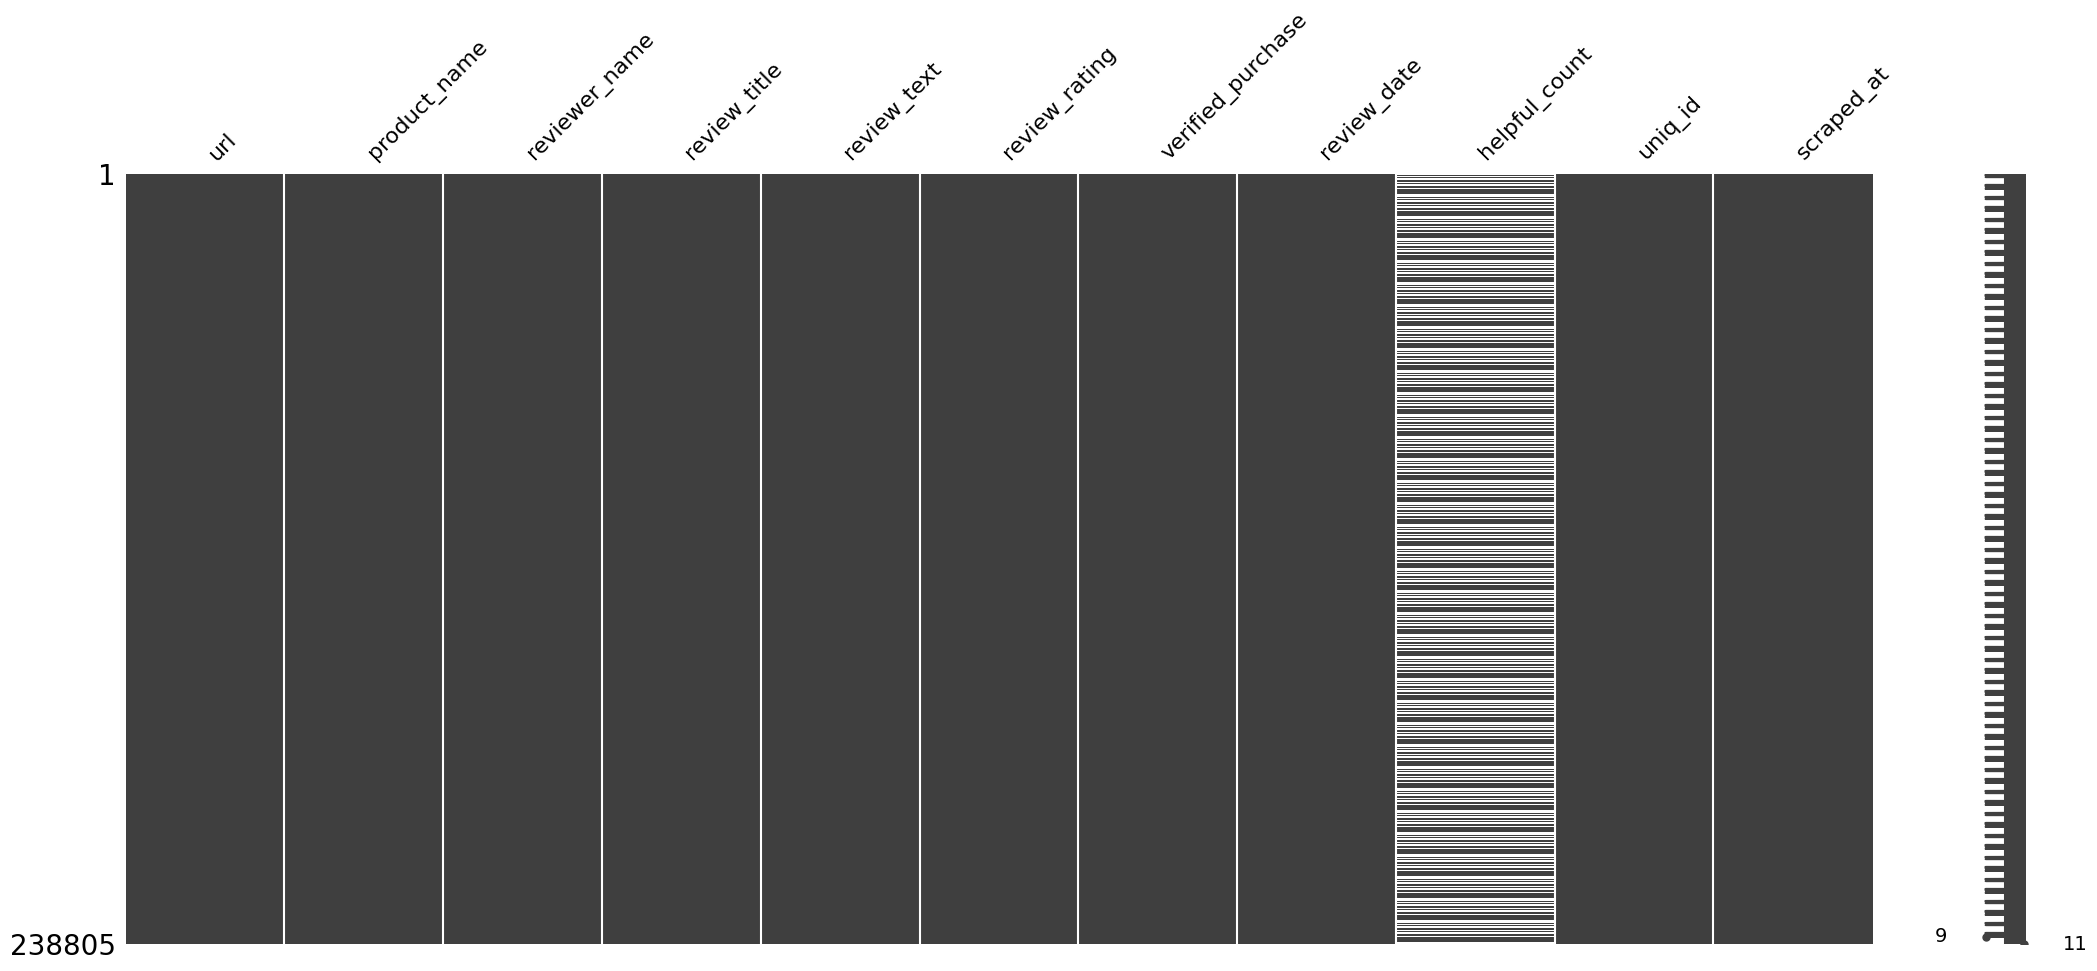

In [33]:
msno.matrix(amzReview)

<AxesSubplot:>

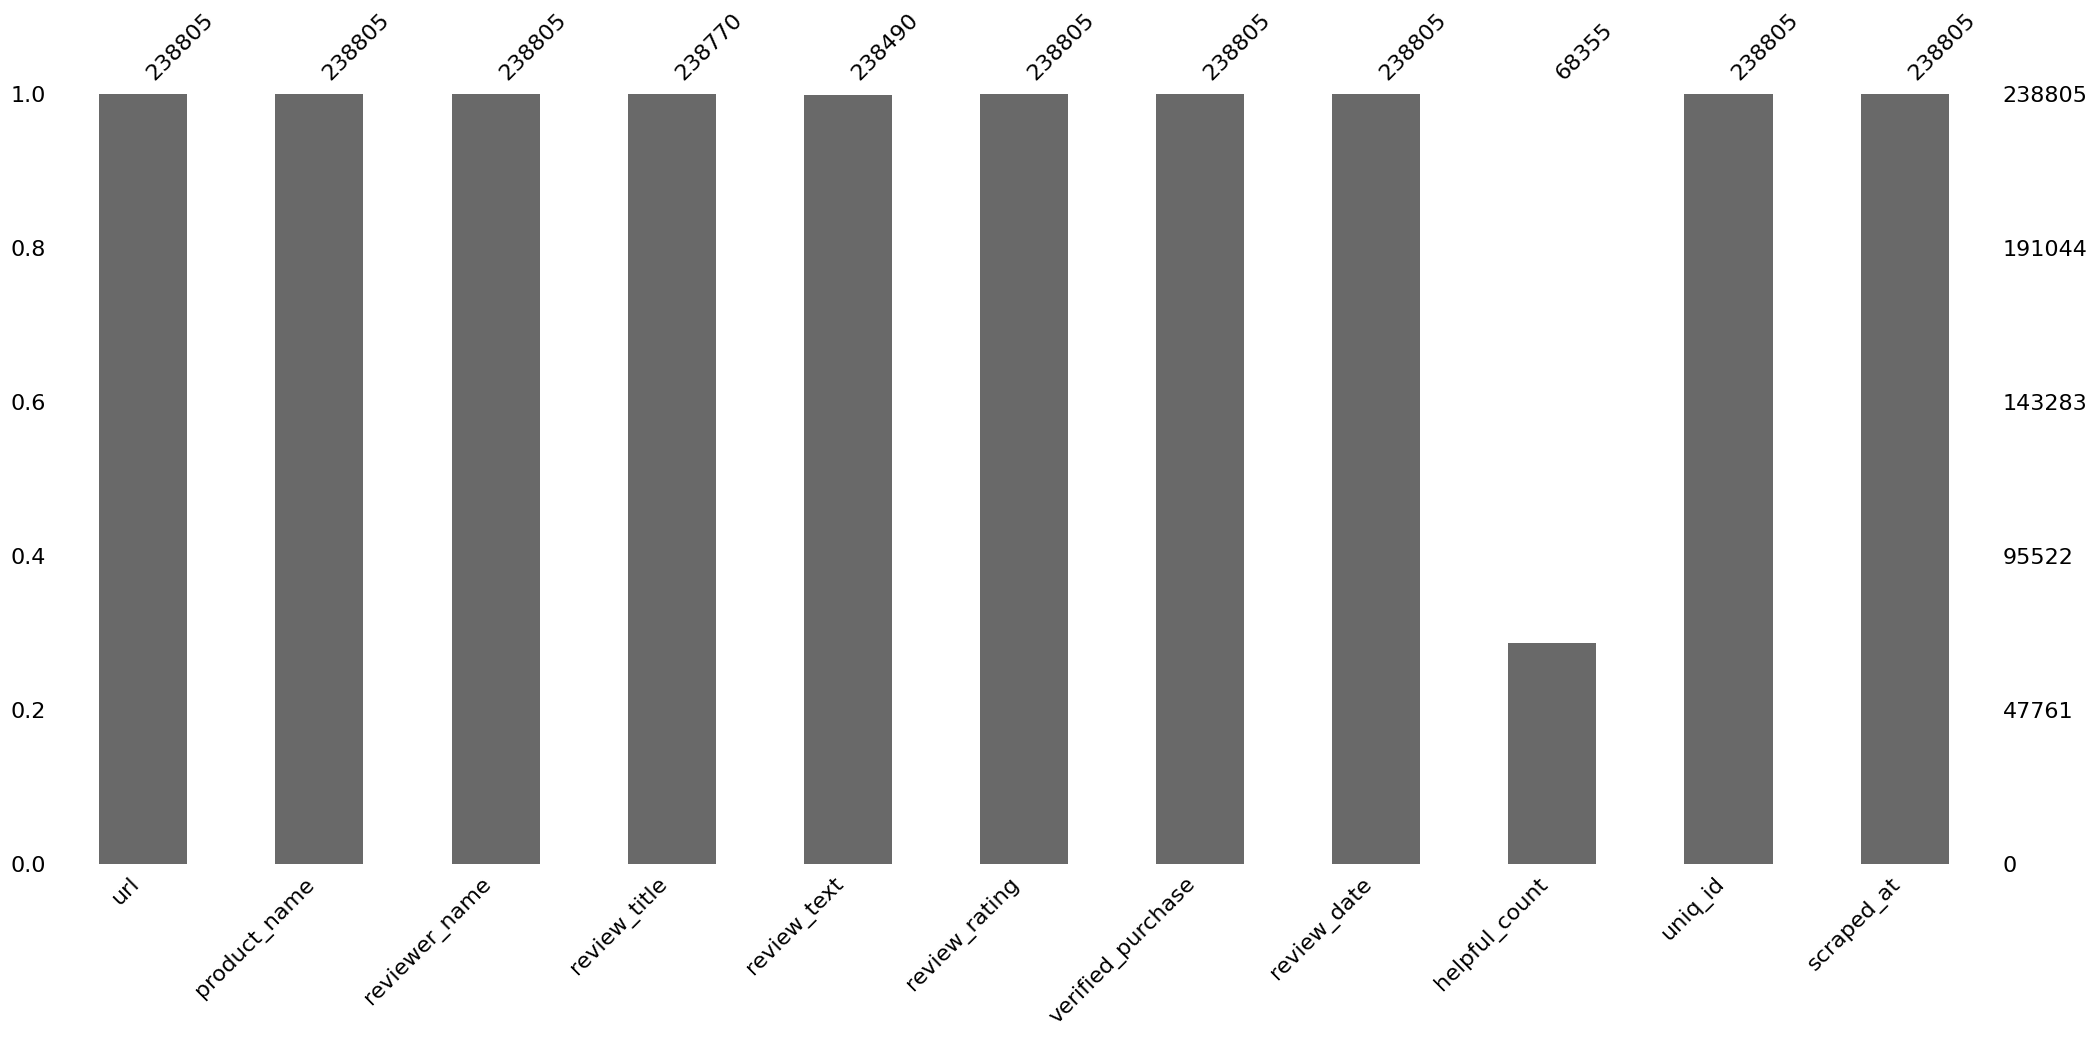

In [34]:
msno.bar(amzReview)

<AxesSubplot:>

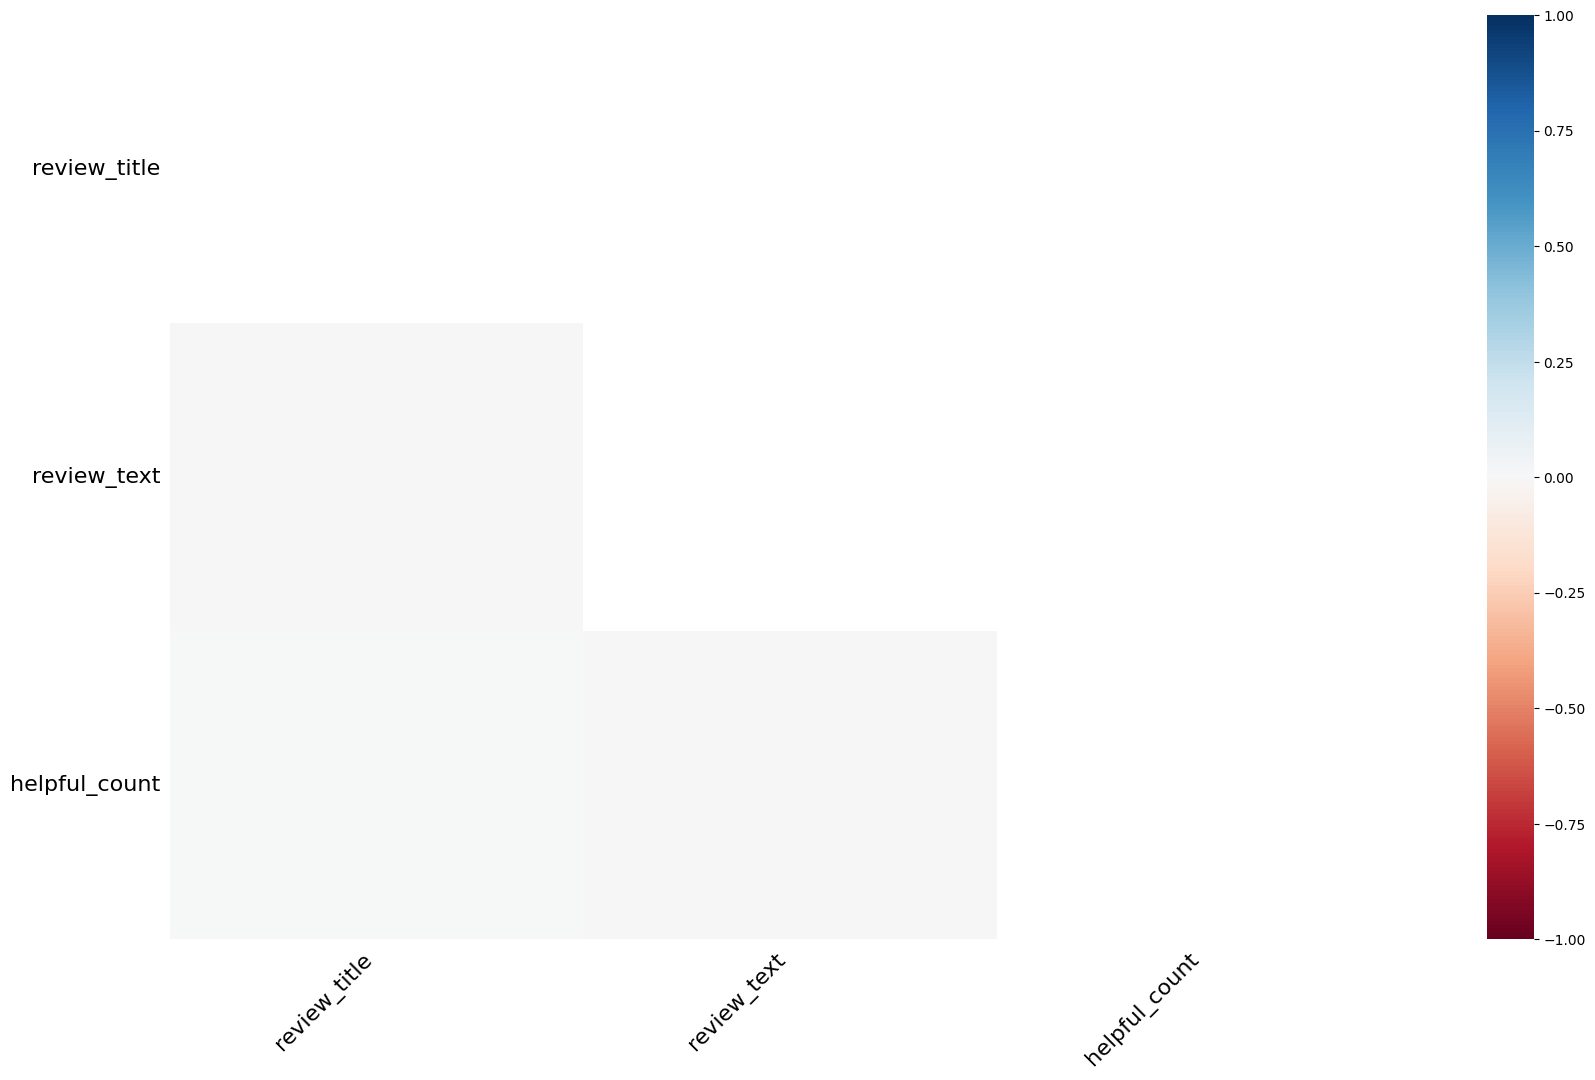

In [35]:
msno.heatmap(amzReview)

Drop Columns whoes null value is greater than 40%

In [36]:
thresh = missing_per[missing_per>40] 
thresh

helpful_count    71.4
dtype: float64

In [37]:
dropped_null = amzReview.drop(columns="helpful_count",inplace=True)

Check if helpful_review column was successfully dropped

In [38]:
amzReview.head(1)

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,1,Reviewed in the United States on 2 June 2020,36eae4e5-2894-5279-a0b7-d2b330e2b814,2021-12-24T02:26:25


In [39]:
amzReview[amzReview.duplicated()]

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,uniq_id,scraped_at
6823,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,1,Reviewed in the United States on 2 June 2020,36eae4e5-2894-5279-a0b7-d2b330e2b814,2021-12-24T02:26:25
6824,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,1,Reviewed in the United States on 28 October 2021,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,2021-12-24T02:26:25
6825,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,1,Reviewed in the United States on 20 January 2021,db5a7525-d40b-5265-84d8-df4f29837a3b,2021-12-24T02:26:25
6826,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,1,Reviewed in the United States on 22 April 2021,75a42851-6462-54b5-988a-27d336221943,2021-12-24T02:26:25
6827,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,1,Reviewed in Italy on 2 April 2021,232dee43-849e-5d06-ba05-efb3f4814714,2021-12-24T02:26:25
...,...,...,...,...,...,...,...,...,...,...
238800,https://www.amazon.co.uk/dp/B07TPYWFVN,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",mauti72,Schick und leicht,"Schicker Schuh, läuft sich gut.",5.0,1,Reviewed in Germany on 15 October 2020,0850eae1-fa2f-59e6-bf30-ad49151bfa20,2021-12-24T02:29:39
238801,https://www.amazon.co.uk/dp/B07TPYWFVN,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",Charles Lechesnier,EXCELLENT,Mieux que je ne l'imaginais. Très bonne taille...,5.0,1,Reviewed in France on 23 August 2020,4bf117ed-ea7c-517c-967c-2aee3f80ed29,2021-12-24T02:29:39
238802,https://www.amazon.co.uk/dp/B084WB2D93,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Rebecca Lützenkirchen,Einfach schöne Hausschuhe,Habe sie als Geschenk gekauft und sie sind seh...,5.0,1,Reviewed in Germany on 4 October 2021,5b129eb2-a438-5377-9c46-217a177615b2,2021-12-24T02:29:39
238803,https://www.amazon.co.uk/dp/B084WB2D93,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Sergej Friedel,Langlebig.,Trage diese Hausschuhe fast zwei Monate jeden ...,5.0,1,Reviewed in Germany on 31 January 2021,91144305-98db-5a55-8ec4-16a253beb811,2021-12-24T02:29:39


Check for duplicate in dataset

In [40]:
amzReview[amzReview.duplicated()].count()

url                  231982
product_name         231982
reviewer_name        231982
review_title         231948
review_text          231676
review_rating        231982
verified_purchase    231982
review_date          231982
uniq_id              231982
scraped_at           231982
dtype: int64

<h3>Data Cleaning</h3>

Replace 1 with True and 0 with False in the verified column

In [41]:
#amzReview["verified_purchase"] = amzReview["verified_purchase"].replace(1,"True")
#amzReview["verified_purchase"] = amzReview["verified_purchase"].replace(0,"False")

See the changes

In [42]:
amzReview.sample(2)

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,uniq_id,scraped_at
76217,https://www.amazon.co.uk/dp/B07WWJV48M,"Clarks Men's Step Stroll Lace Sneaker, Black L...",Lucastvshows22,Great product,This is a great product! I would purchase,5.0,1,Reviewed in the United States on 11 October 2020,8f47a18a-ee02-5493-9cd0-dd178cb022b6,2021-12-24T02:26:55
9876,https://www.amazon.co.uk/dp/B07DM34YV6,"ASICS - Womens Jolt 2 Shoes, 4.5 UK, Indigo Bl...",Alok Ranjan,It is OK but not very great shoe,It is OK but not very great shoe.,2.0,1,Reviewed in Singapore on 10 July 2020,b34505c1-095f-56b3-aff4-23c82c44b2da,2021-12-24T02:27:57


Selecting the columns for analysis

In [43]:
amzReview.columns

Index(['url', 'product_name', 'reviewer_name', 'review_title', 'review_text',
       'review_rating', 'verified_purchase', 'review_date', 'uniq_id',
       'scraped_at'],
      dtype='object')

In [44]:
amzRefined = amzReview.copy()

In [45]:
amzRefined =amzReview[['product_name', 'reviewer_name', 'review_title', 'review_text','review_rating', 'verified_purchase', 'review_date', 'scraped_at','uniq_id']]

View the data

In [46]:
amzRefined.head(2)

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,scraped_at,uniq_id
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,1,Reviewed in the United States on 2 June 2020,2021-12-24T02:26:25,36eae4e5-2894-5279-a0b7-d2b330e2b814
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,1,Reviewed in the United States on 28 October 2021,2021-12-24T02:26:25,f4778bb8-3070-5cb1-b5aa-ffce41a97b57


View the data types again

In [47]:
amzRefined.dtypes

product_name          object
reviewer_name         object
review_title          object
review_text           object
review_rating        float64
verified_purchase      int64
review_date           object
scraped_at            object
uniq_id               object
dtype: object

CLEAN THE REVIEW_DATE COLUMN AND CREATE REVIEW_COUNTRY COLUMN FROM IT

Split the text into date and text data from review_date column

In [48]:
amzRefined["review_country"] = amzReview["review_date"].str.split('(\d+)')

View 5 samples of the data to see the changes

In [49]:
amzRefined['review_country'].sample(5)


43364           [Reviewed in Japan on , 23,  July , 2019, ]
151513    [Reviewed in the United States on , 9,  July ,...
68687         [Reviewed in Mexico on , 21,  March , 2020, ]
213630    [Reviewed in the United States on , 22,  April...
75278        [Reviewed in Canada on , 30,  August , 2021, ]
Name: review_country, dtype: object

Get the first index of the string and save it in review_country column

In [50]:
amzRefined['review_country'] = amzRefined['review_country'].str[0]

Replace the review_country column string 'on' with nothing 

In [51]:
amzRefined['review_country'] = amzRefined['review_country'].str.replace('on','')

See changes

In [52]:
amzRefined.sample(1)

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,scraped_at,uniq_id,review_country
33794,"adidas Men's Solar Drive 19 Running Shoe, Blac...",LM,Holds up well,Great shoes. ordered for my son. Fits great. ...,5.0,1,Reviewed in the United States on 14 December 2020,2021-12-24T02:29:28,28fb9ca8-6fd7-5870-a2c8-c6933697abd9,Reviewed in the United States


Split text again to seperate date from text

In [53]:
amzRefined["review_date"] = amzRefined["review_date"].str.split('(\d+)')
amzRefined['review_date'] = amzRefined['review_date'].str[1:]
amzRefined['review_date'].sample(10)

141834      [23,  August , 2020, ]
32443        [18,  April , 2020, ]
184938       [2,  August , 2020, ]
66502     [18,  December , 2021, ]
161064     [2,  November , 2021, ]
138000     [28,  October , 2021, ]
58374      [28,  January , 2017, ]
141738       [5,  August , 2021, ]
30044       [29,  August , 2021, ]
96310         [4,  April , 2021, ]
Name: review_date, dtype: object

Store result in review_date column

Merge the 3 created columns together to make up the review_date content

In [54]:
date = list(amzRefined['review_date'])
Date = pd.DataFrame(date)
Date.columns = ["daily_review","monthly_review","yearly_review","g"]
Date.reset_index(drop = True)
date_ = Date.daily_review+ " "+Date.monthly_review+" "+Date.yearly_review

In [55]:
amzRefined['review_date'] = date_

Replace month strings to numerical ones

In [56]:
amzRefined['review_date'] = amzRefined['review_date'].str.replace("January","1")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("February","2")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("March","3")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("April","4")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("May","5")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("June","6")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("July","7")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("August","8")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("September","9")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("October","10")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("November","11")
amzRefined['review_date'] = amzRefined['review_date'].str.replace("December","12")

View Changes

In [57]:
amzRefined.review_date

0           2  6  2020
1         28  10  2021
2          20  1  2021
3          22  4  2021
4           2  4  2021
              ...     
238800    15  10  2020
238801     23  8  2020
238802     4  10  2021
238803     31  1  2021
238804     27  1  2021
Name: review_date, Length: 238805, dtype: object

Remove unneccessary texts from review_country and store the result in review_country

In [58]:
amzRefined['review_country'] = amzRefined['review_country'].str.replace('the','')
amzRefined['review_country'] = amzRefined['review_country'].str.replace('Reviewed in','')

Convert date to datetime data type

In [59]:
amzRefined.review_date = pd.to_datetime(amzRefined.review_date)

View Changes

In [60]:
amzRefined.review_date

0        2020-02-06
1        2021-10-28
2        2021-01-20
3        2021-04-22
4        2021-02-04
            ...    
238800   2020-10-15
238801   2020-08-23
238802   2021-04-10
238803   2021-01-31
238804   2021-01-27
Name: review_date, Length: 238805, dtype: datetime64[ns]

In [61]:
amzRefined.head(3)

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,scraped_at,uniq_id,review_country
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,1,2020-02-06,2021-12-24T02:26:25,36eae4e5-2894-5279-a0b7-d2b330e2b814,United States
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,1,2021-10-28,2021-12-24T02:26:25,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,United States
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,1,2021-01-20,2021-12-24T02:26:25,db5a7525-d40b-5265-84d8-df4f29837a3b,United States


Drop the reset and drop index

In [62]:
amzRefined = amzRefined.reset_index(drop=True)
amzRefined.head(3)

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,scraped_at,uniq_id,review_country
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,1,2020-02-06,2021-12-24T02:26:25,36eae4e5-2894-5279-a0b7-d2b330e2b814,United States
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,1,2021-10-28,2021-12-24T02:26:25,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,United States
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,1,2021-01-20,2021-12-24T02:26:25,db5a7525-d40b-5265-84d8-df4f29837a3b,United States


Data Cleaned and Ready for Analysis

<h2>Eploratory Data Analysis(EDA)</h2>

<h3>Understanding the Distributions by visualisation</h3>

Understanding the outliers

Text(0.5, 1.0, 'Ratings')

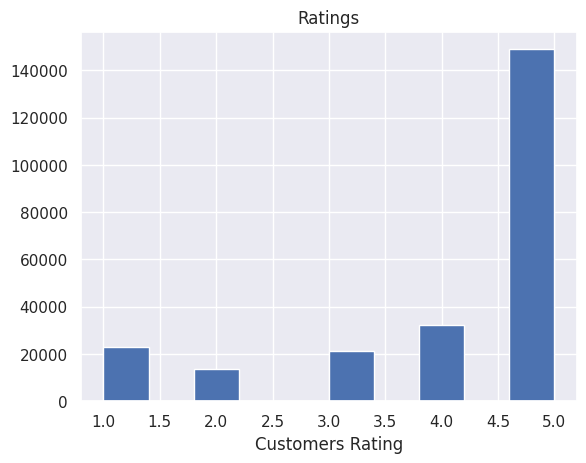

In [63]:
import seaborn;seaborn.set()

#sns.FacetGrid(amzRefined, col="review_date", row="review_rating").map(sns.histplot, "flipper_length_mm")
amzRefined.review_rating.hist()
plt.xlabel('Customers Rating')
plt.title('Ratings')
#fig,ax=plt.subplots(figsize = (18,10))
#plt.plot(amzRefined)

<AxesSubplot:title={'center':'Rating Year'}, xlabel='Rating Year'>

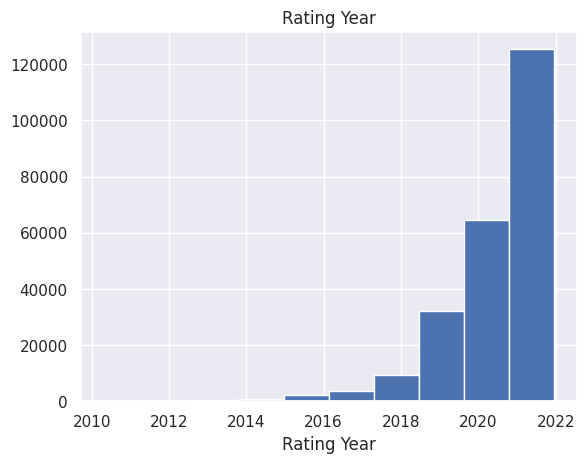

In [64]:
plt.title('Rating Year')
plt.xlabel('Rating Year')
amzRefined.review_date.hist()

<AxesSubplot:title={'center':'Visualizing Outliers with boxplot in Review Rating'}, xlabel='Range', ylabel='Rating'>

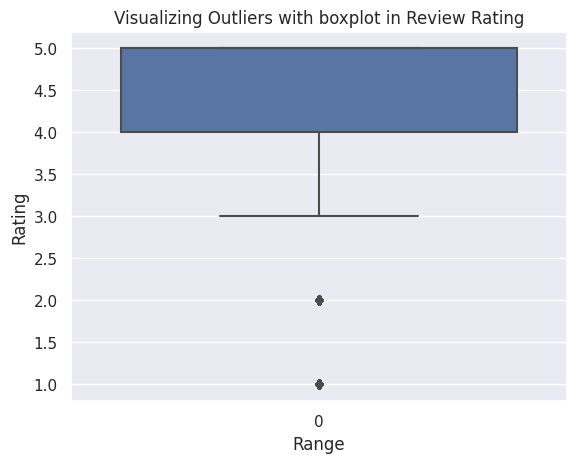

In [65]:
%matplotlib inline
plt.title('Visualizing Outliers with boxplot in Review Rating')
plt.ylabel('Rating')
plt.xlabel('Range')
sns.boxplot(amzRefined.review_rating)

View data bounds for the outliers

In [66]:
print(np.where(amzRefined['review_rating']>2.5))

(array([     0,      2,      3, ..., 238802, 238803, 238804]),)


I am no considering the outlier because various countries citizens have different rating habit.Some may decide to give their ratings while some may not

In [67]:
#from scipy import stats
#amzRefined['review_rating'] = stats.zscore(amzRefined['review_rating'])

<h2>How Many purchases were verified?</h2>

In [68]:
l = vp=amzRefined.groupby('verified_purchase').sum()
vp = vp.reset_index()
vp.columns = ['verified purchase status','purchase count']
vp

,verified purchase status,purchase count
0,0,2100.0
1,1,984760.0


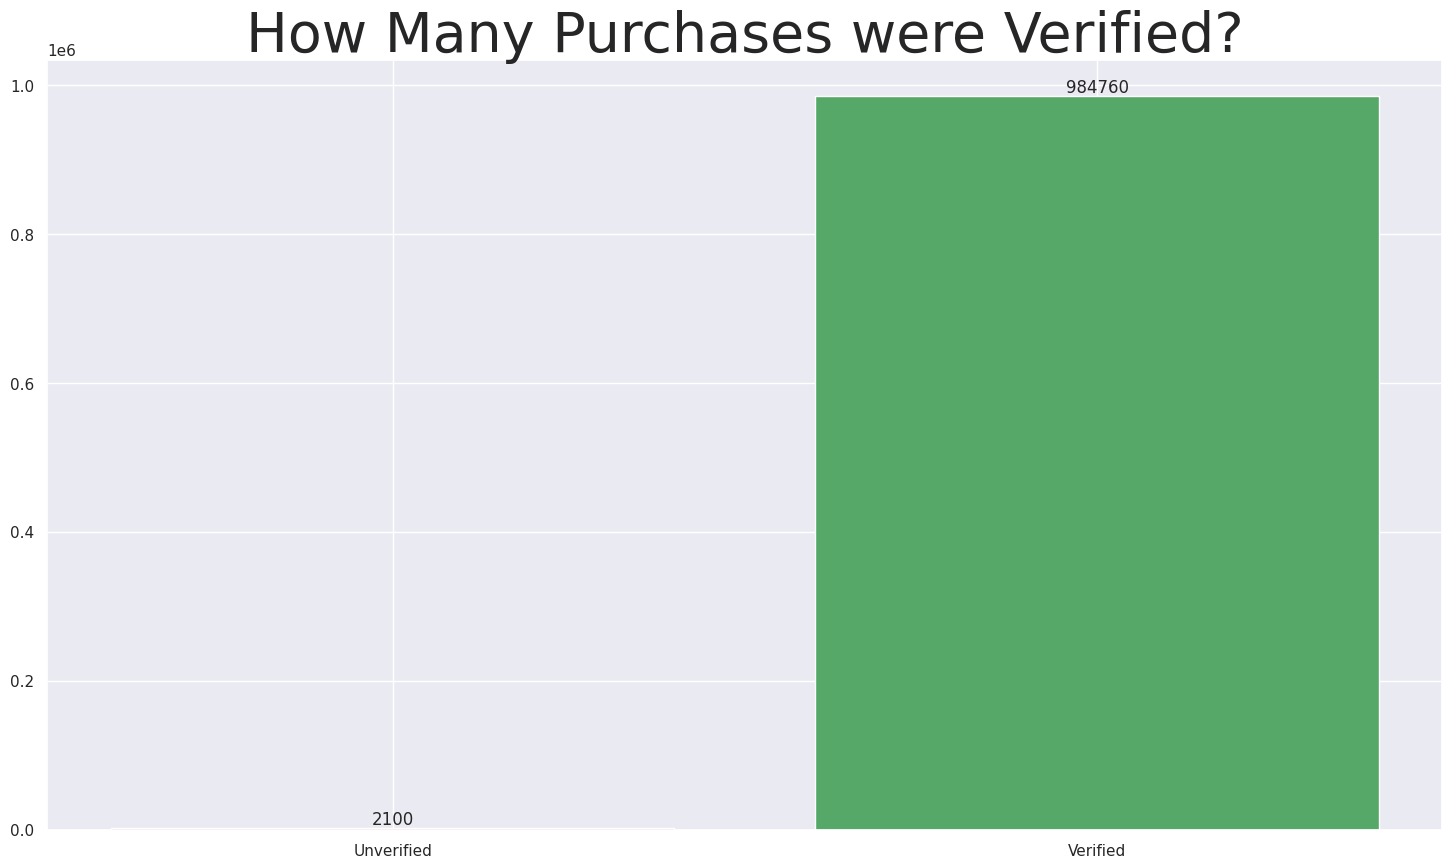

In [69]:
import seaborn;seaborn.set()

fig, ax = plt.subplots(figsize = (18,10))
x = vp['verified purchase status'].index
y=vp['purchase count']
ax.set_xticks(x)
plt.title('How Many Purchases were Verified?',fontsize =40)
l = ax.bar(x,y,color=['r','g'])
ax.bar_label(l)
ax.set_xticklabels(["Unverified","Verified"])
plt.show()

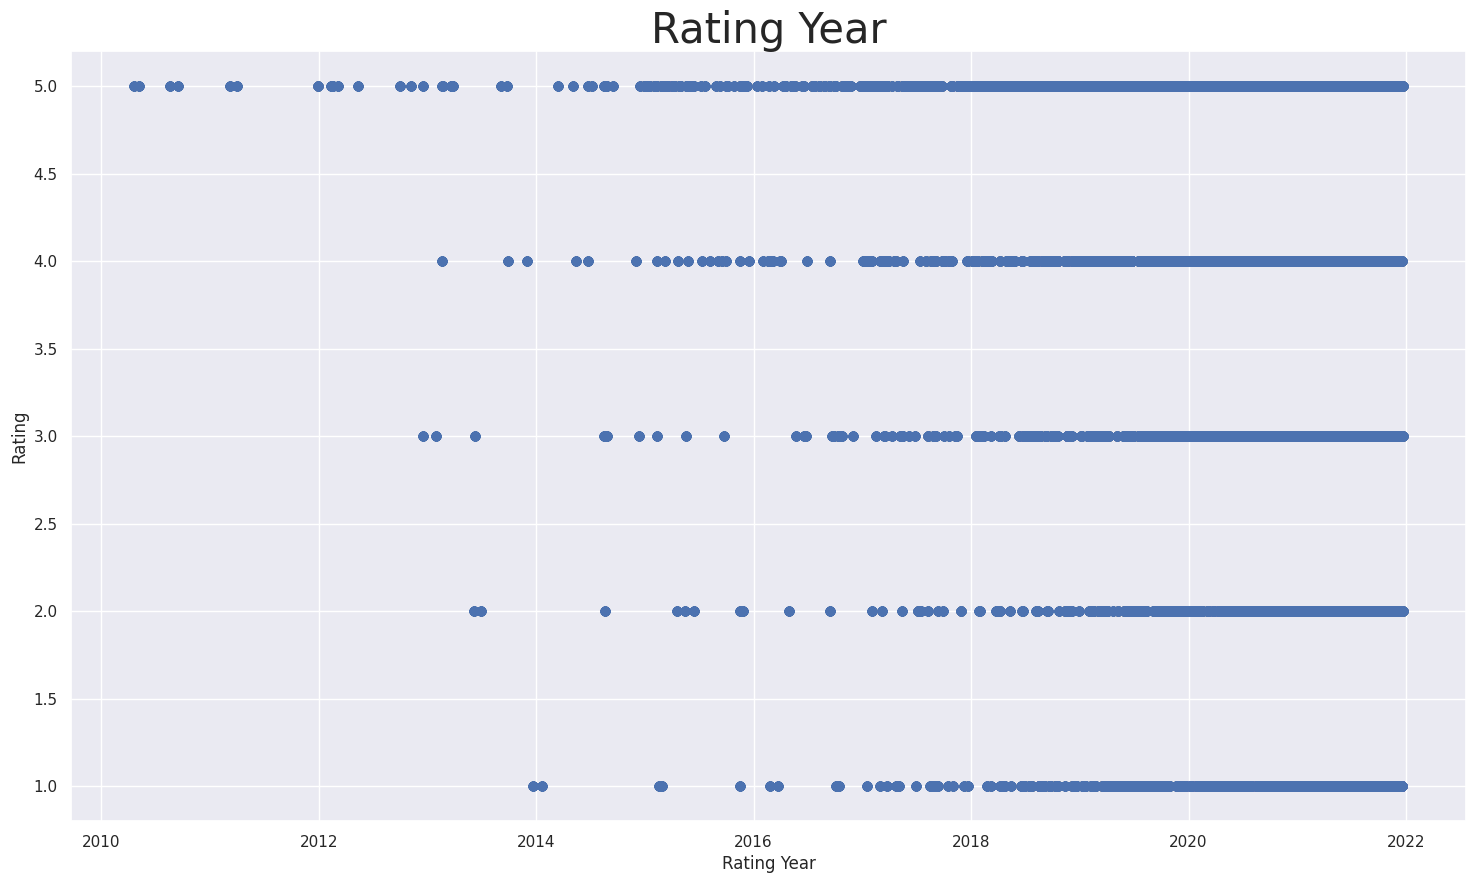

In [70]:
# Scatter plot

fig, ax = plt.subplots(figsize = (18,10))

ax.scatter(amzRefined['review_date'], amzRefined['review_rating'])
 
# x-axis label
ax.set_title('Rating Year',fontsize=30)

ax.set_xlabel('Rating Year')
 
# y-axis label

ax.set_ylabel('Rating')
plt.show()

<h2> Visualizing Country Rating Trends</h2>

<AxesSubplot:title={'center':'What is the trend in customer rating for various country?'}, xlabel='review_date', ylabel='review_country'>

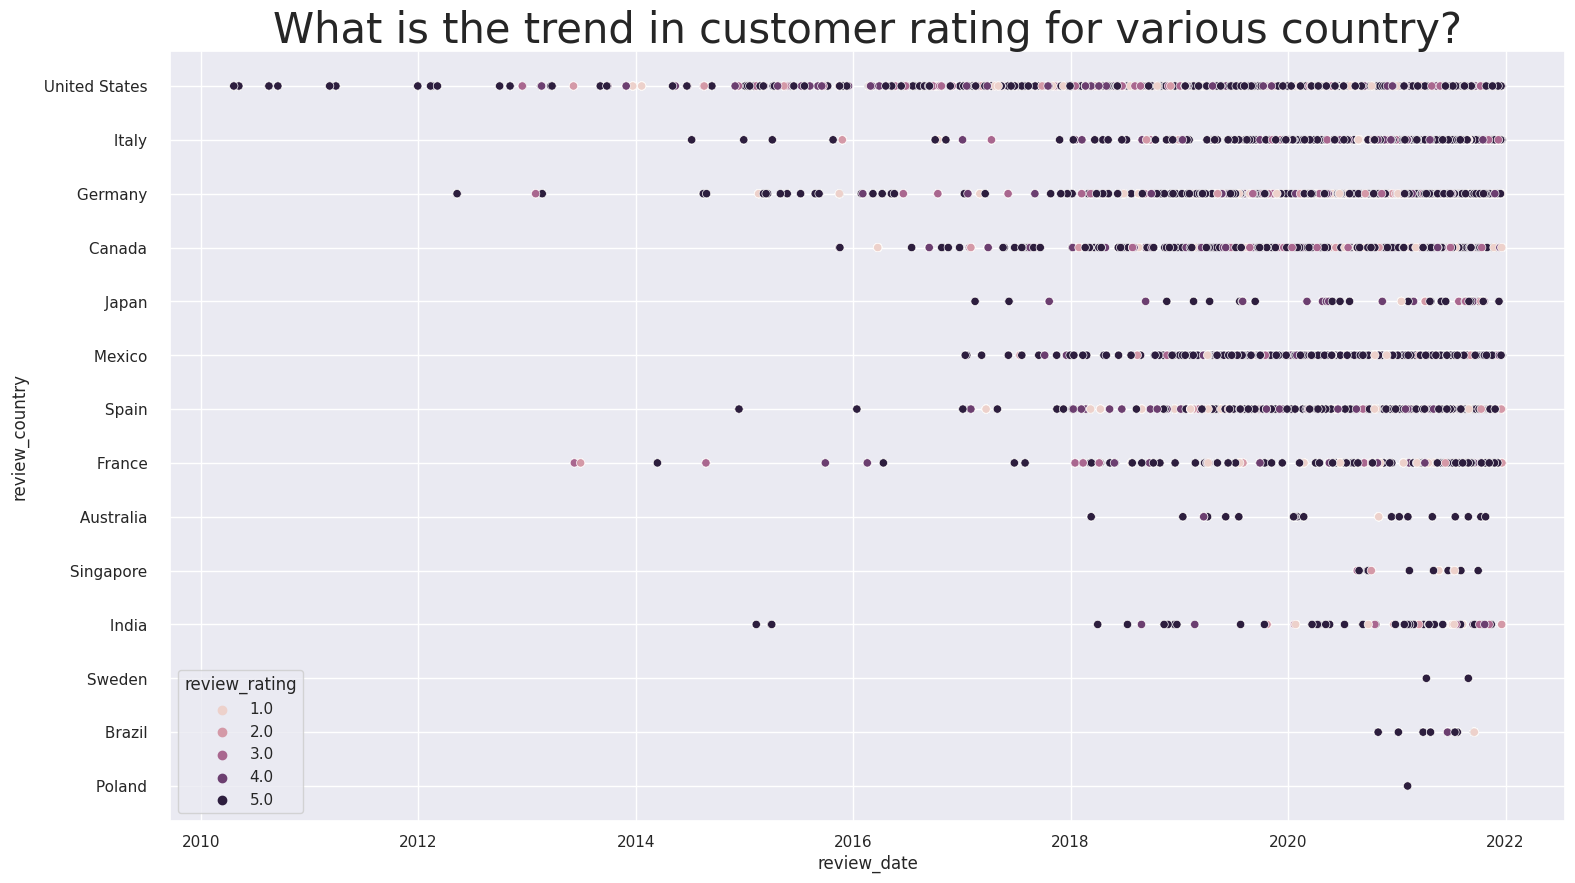

In [71]:
plt.figure(figsize = (18,10))
plt.title('What is the trend in customer rating for various country?',fontsize=30)
sns.scatterplot( x = "review_date", 
                 y = "review_country", 
                 data = amzRefined, 
                 hue = "review_rating")

In [72]:
# Five Star Rating
five=amzRefined[amzRefined['review_rating']==5.0]
five.head

<bound method NDFrame.head of                                              product_name  \
0       Klasified Women's Transparent Clear Sneaker Sh...   
2       Klasified Women's Transparent Clear Sneaker Sh...   
3       Klasified Women's Transparent Clear Sneaker Sh...   
4       GUESS Women's Bradly Gymnastics Shoe, White, 7 UK   
6       GUESS Women's Bradly Gymnastics Shoe, White, 7 UK   
...                                                   ...   
238800  Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...   
238801  Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...   
238802  Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK   
238803  Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK   
238804  Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK   

                reviewer_name                              review_title  \
0            Jocelyn McSayles                                   Love em   
2                 Chris Souza                              Good quality   
3           

<h2>How many countries gave a 5 star review</h2>

In [73]:
fiveStar=five.groupby('review_country',['verified_purchase']==1)['review_rating'].count()
fiveStar=fiveStar.reset_index(drop=False)
fiveStar

,review_country,review_rating
0,United States,63700
1,Australia,630
2,Brazil,280
3,Canada,15960
4,France,3710
5,Germany,25165
6,India,1190
7,Italy,12460
8,Japan,875
9,Mexico,14945


[Text(0, 0, '63700'),
 Text(0, 0, '630'),
 Text(0, 0, '280'),
 Text(0, 0, '15960'),
 Text(0, 0, '3710'),
 Text(0, 0, '25165'),
 Text(0, 0, '1190'),
 Text(0, 0, '12460'),
 Text(0, 0, '875'),
 Text(0, 0, '14945'),
 Text(0, 0, '35'),
 Text(0, 0, '280'),
 Text(0, 0, '9625'),
 Text(0, 0, '70')]

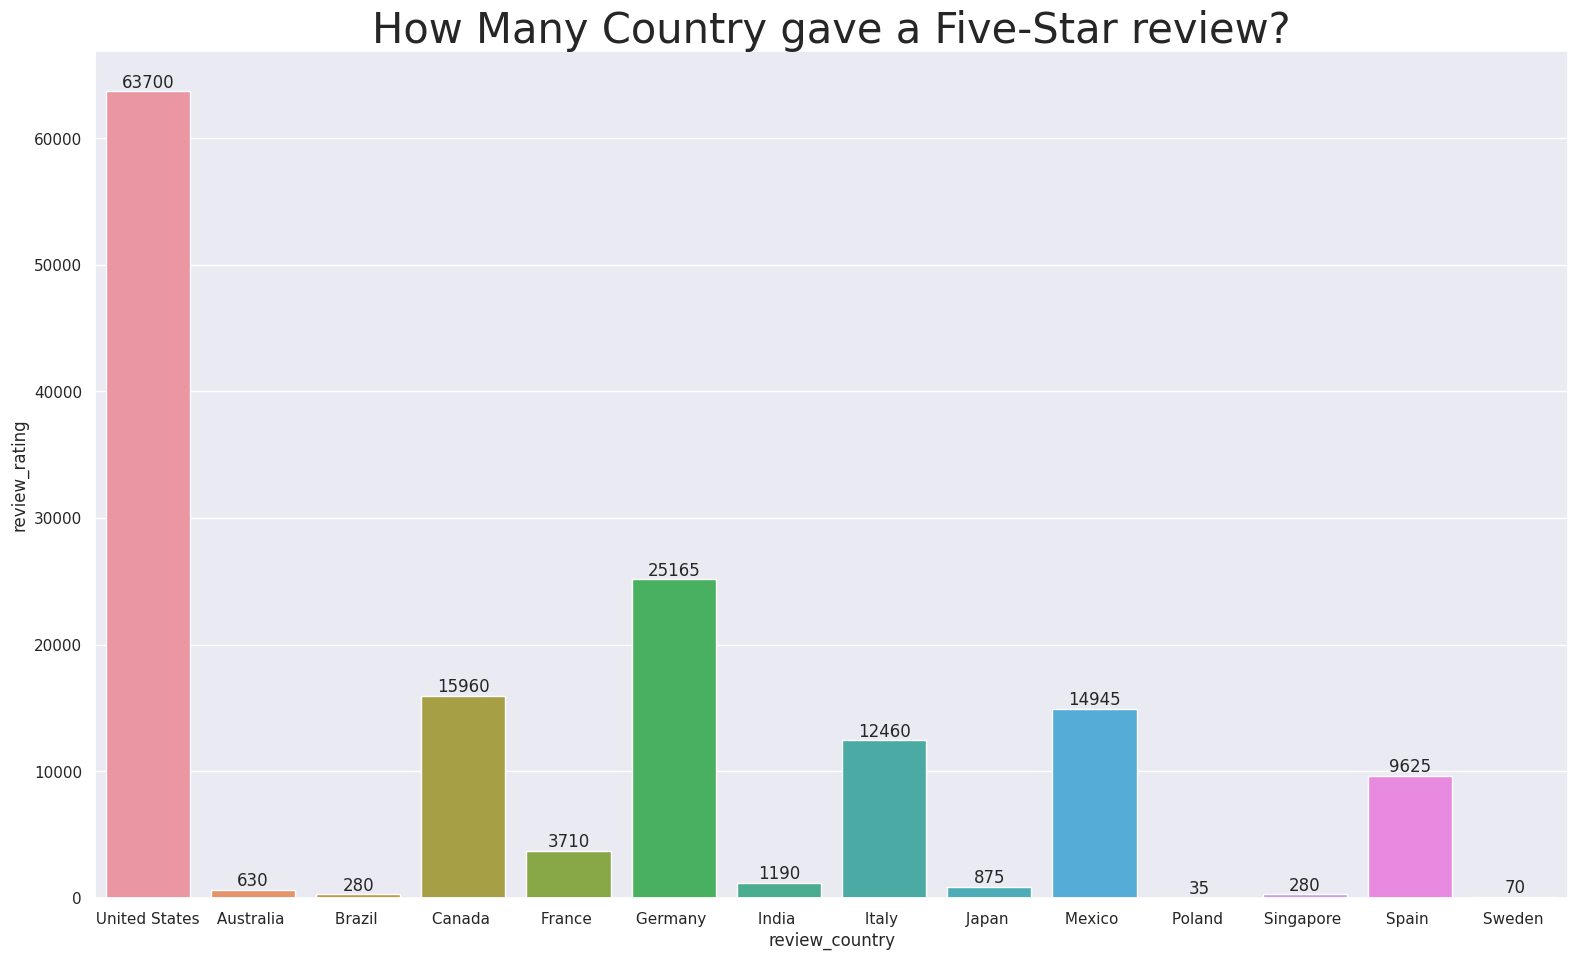

In [74]:
plt.rcParams['figure.figsize'] = (19,11)
plt.title('How Many Country gave a Five-Star review?',fontsize=30)
ax=sns.barplot(fiveStar,x='review_country',y='review_rating')
ax.bar_label(ax.containers[0])

<h2>Countries Rating Count</h2>

In [75]:
Ratings = amzRefined.groupby(by=["review_country"])["uniq_id"].count()
Rating = Ratings.reset_index()
#Rating = Rating.set_index('review_date')
Rating.columns=["Country","Rating_count"]
Rating

,Country,Rating_count
0,United States,113610
1,Australia,735
2,Brazil,350
3,Canada,24395
4,France,5950
5,Germany,37415
6,India,2100
7,Italy,17850
8,Japan,1610
9,Mexico,19425


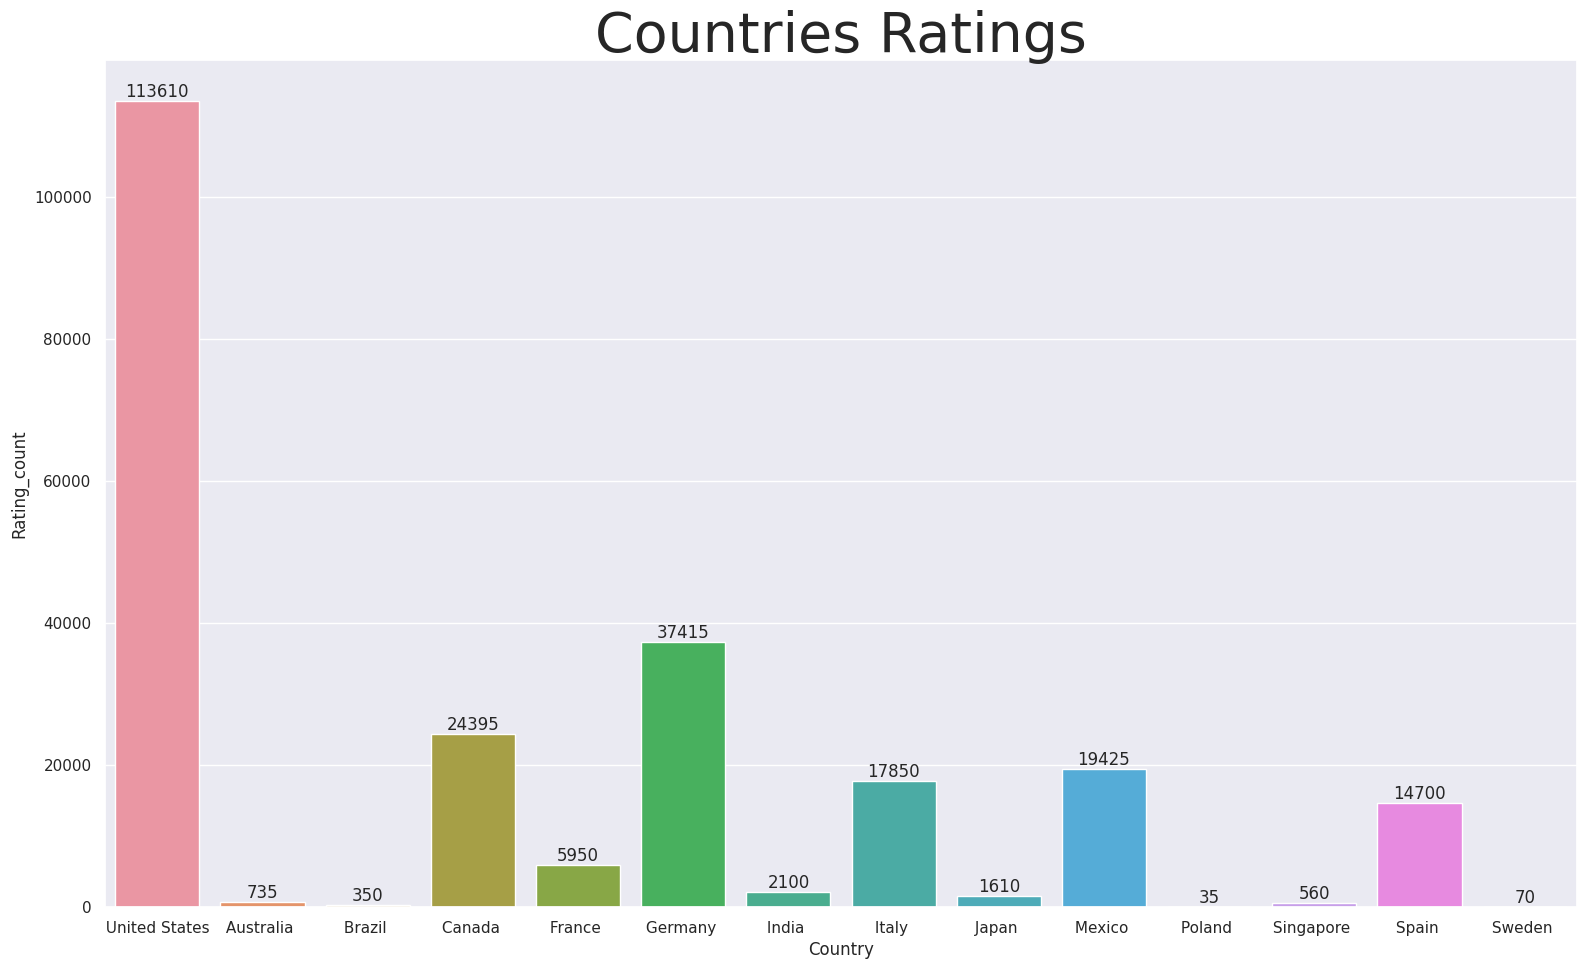

In [76]:
#plt.rcParams['figure.figsize'] = (19,11)
fig, ax = plt.subplots(figsize = (19,11))
plt.title('Countries Ratings',fontsize=40)
plt.ylabel('Countries')
plt.xlabel('Index')
label=sns.barplot(data=Rating,x='Country',y='Rating_count')
ax.bar_label(ax.containers[0])
plt.show()

<h2>Top 5 Star Rating</h2>

In [77]:
top5 = fiveStar.sort_values(by='review_rating',ascending=False).head(5)
top5

,review_country,review_rating
0,United States,63700
5,Germany,25165
3,Canada,15960
9,Mexico,14945
7,Italy,12460


[Text(0, 0, '63700'),
 Text(0, 0, '25165'),
 Text(0, 0, '15960'),
 Text(0, 0, '14945'),
 Text(0, 0, '12460')]

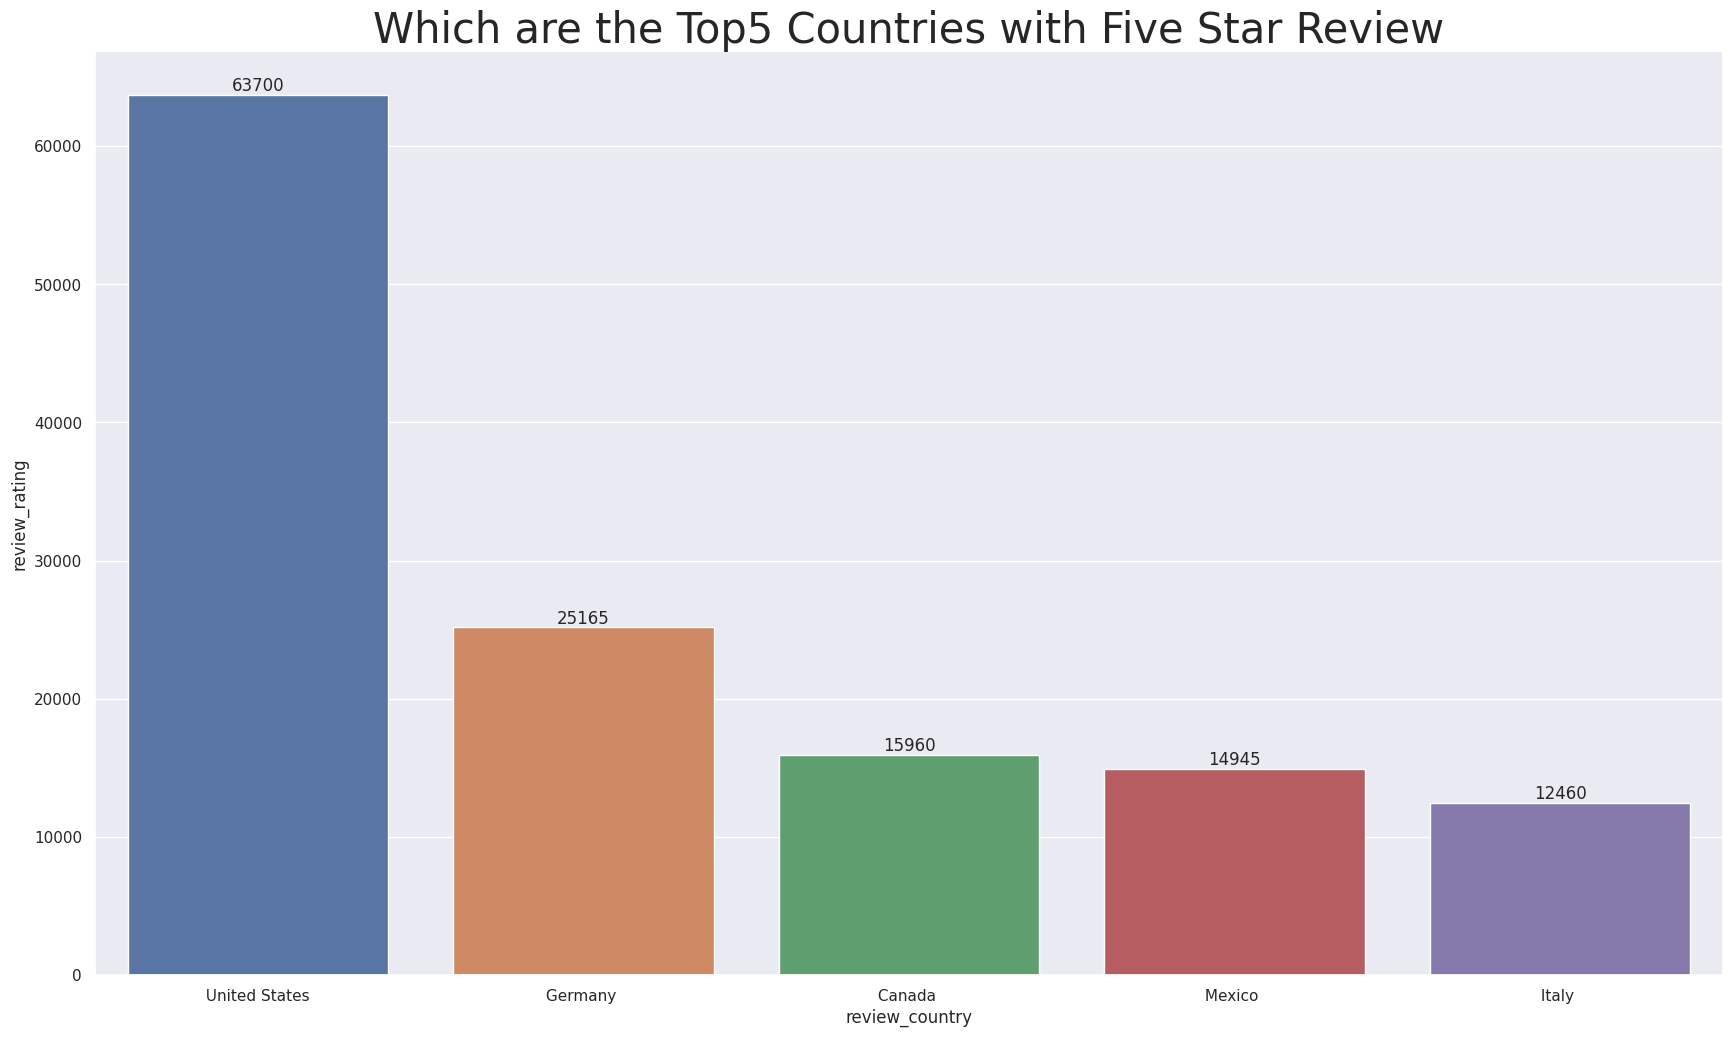

In [78]:
fig, ax = plt.subplots(figsize = (21,12))
plt.title('Which are the Top5 Countries with Five Star Review',fontsize=30)
sns.barplot(top5,y='review_rating',x='review_country')
ax.bar_label(ax.containers[0])

<h2>One Star Rating</h2>

In [79]:
# Five Star Rating
one=amzRefined[amzRefined['review_rating']==1.0]
one=one.groupby('review_country',['verified_purchase']==1)['review_rating'].count()
one=one.reset_index(drop=False)

oneS= one.nlargest(5,'review_rating')
oneS

,review_country,review_rating
0,United States,12180
5,Germany,3010
3,Canada,2205
11,Spain,1645
7,Italy,1295


[Text(0, 0, '12180'),
 Text(0, 0, '3010'),
 Text(0, 0, '2205'),
 Text(0, 0, '1645'),
 Text(0, 0, '1295')]

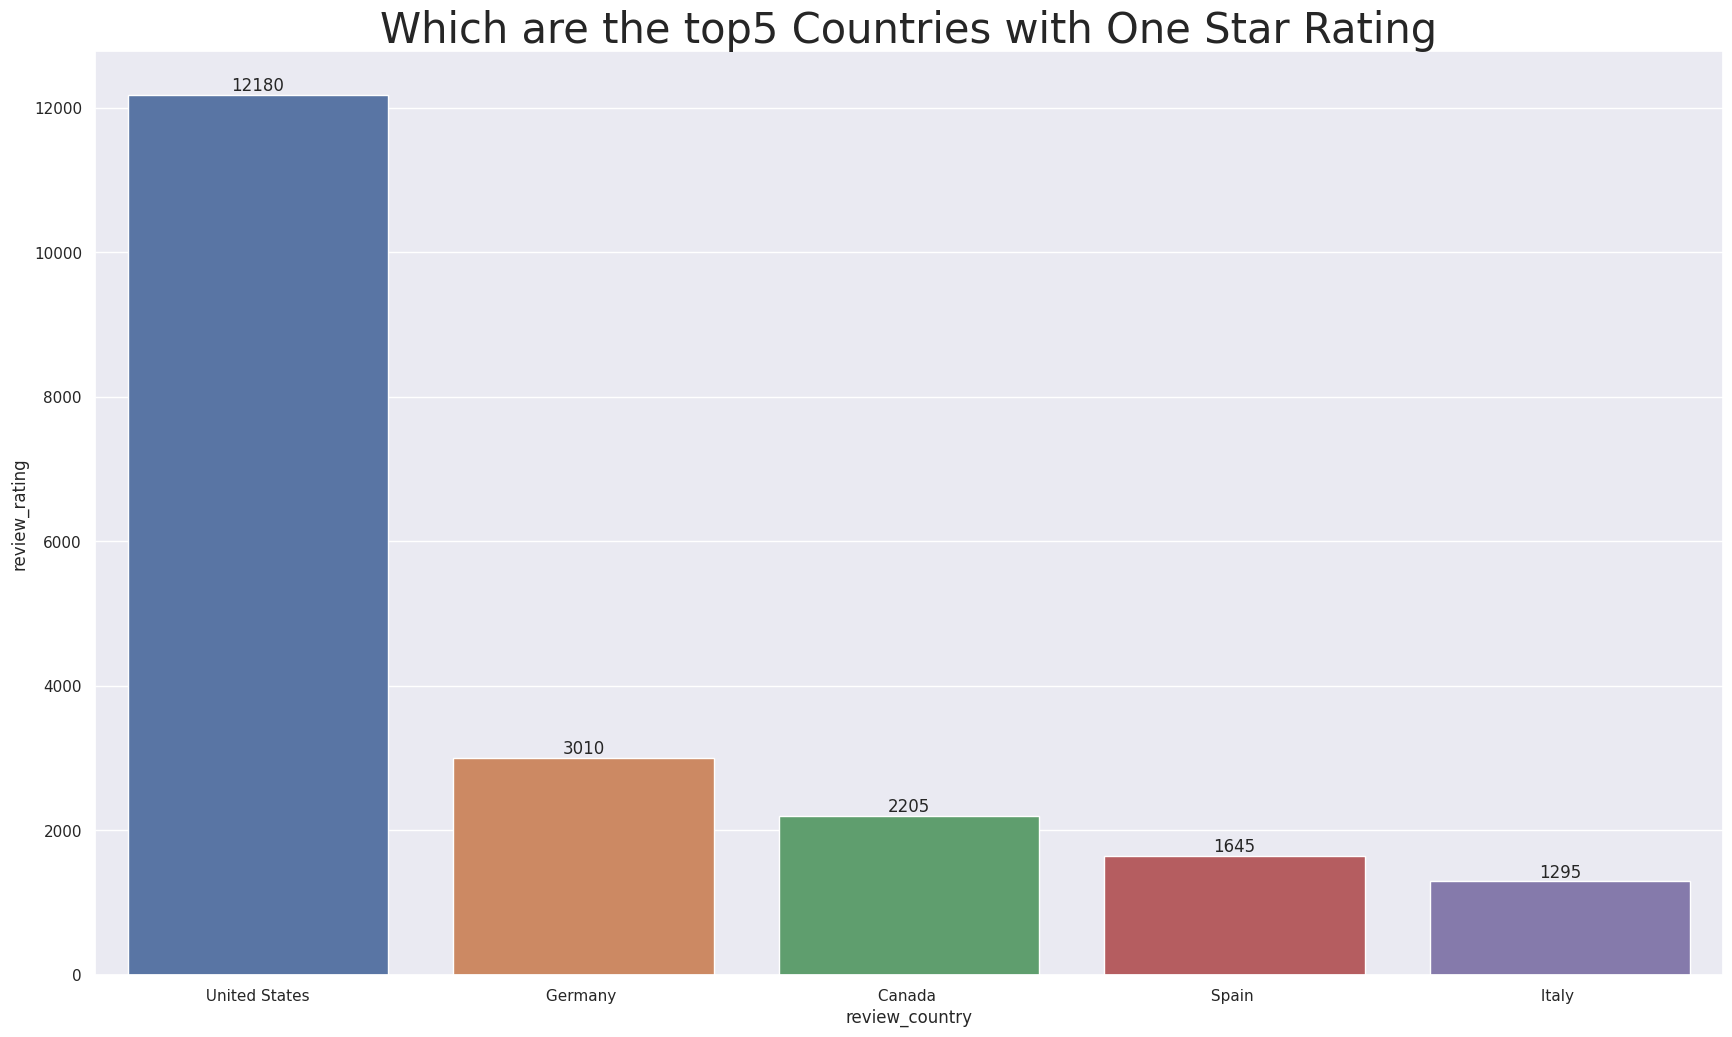

In [80]:

fig, ax = plt.subplots(figsize = (21,12))
plt.title('Which are the top5 Countries with One Star Rating',fontsize=30)
sns.barplot(oneS,y='review_rating',x='review_country')
ax.bar_label(ax.containers[0])

One Star Rating

In [81]:
badr=amzRefined[amzRefined['review_rating']==1.0]
badr

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,scraped_at,uniq_id,review_country
5,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Francesca,delusione,Sono solita comprare scarpe Guess e non ho mai...,1.0,1,2021-09-27,2021-12-24T02:26:25,6fe245b1-453e-59f4-bde8-b40eac3bddcd,Italy
22,"adidas Women's Retrorun Shoes Running, Core Bl...",B. Slate,NO SUPPORT! NOT FOR RUNNING!,I would NOT recommend these for running. They ...,1.0,1,2020-12-07,2021-12-24T02:26:25,1bd3f6f9-6e70-50a8-a913-6c9af4f8c7c7,United States
23,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",George-y,Not as supportive as I had hoped for.,These shoes are cute online but in person...no...,1.0,1,2016-10-05,2021-12-24T02:26:25,51b14655-18d6-556d-bf0b-1cbd9536d9a2,United States
34,Naturino Unisex Babies Cocoon First Walker Sho...,Szerda,Schmerzen am Kind...,"An sich wunderschöner Schuh, auspacken und dir...",1.0,1,2021-12-15,2021-12-24T02:26:25,34cf2187-d430-55c5-9ee9-29d680efa2a1,Germany
37,"Merrell Boys' Burnt Rock Low Sneaker, Black, 1...",Anna,Fell apart after one week,The laces broke after slightly over one week o...,1.0,1,2019-12-22,2021-12-24T02:26:25,c111f9c3-e95b-57c1-8a7f-879f9ec476df,United States
...,...,...,...,...,...,...,...,...,...,...
238716,"Skechers GO RUN TRAIL ALTITUDE, Men's Sneaker,...",Esmail m.,THIS SHOES DID NOT SATISFY ME,"SURPRISINGLY, AFTER 2 WEEKS OF JOGGING I NOTIC...",1.0,1,2021-07-10,2021-12-24T02:29:36,86c8adfa-63db-53ae-8f86-8440dd4d79ce,Canada
238731,SAGUARO Mens Womens Kids Lightweight Breathabl...,RealFrankyBoy,Poor quality neglected product!,I received the first time with manufacturing d...,1.0,1,2021-07-18,2021-12-24T02:29:37,156512f6-70d4-587e-961b-eec7ad07358f,Canada
238733,SAGUARO Mens Womens Kids Lightweight Breathabl...,Charles Frappier/Marcus Wells,Too large and warped,I was looking forward to these shoes for a sum...,1.0,1,2021-12-19,2021-12-24T02:29:37,4da4a7d9-d0eb-5c5d-ac8f-6119f2f52806,Canada
238760,New Balance Girl's Iconic 574 V1 Lace-Up Sneak...,Amazon Customer,I'm actually questioning the authenticity of t...,Sneakers do not come in a box and I'm actually...,1.0,1,2021-01-01,2021-12-24T02:29:38,7db75d8e-357c-582e-b8c8-4ca6b14d9247,United States


Customers that gave one star rating

Text(0.5, 1.0, 'Customers with one star rating are their country')

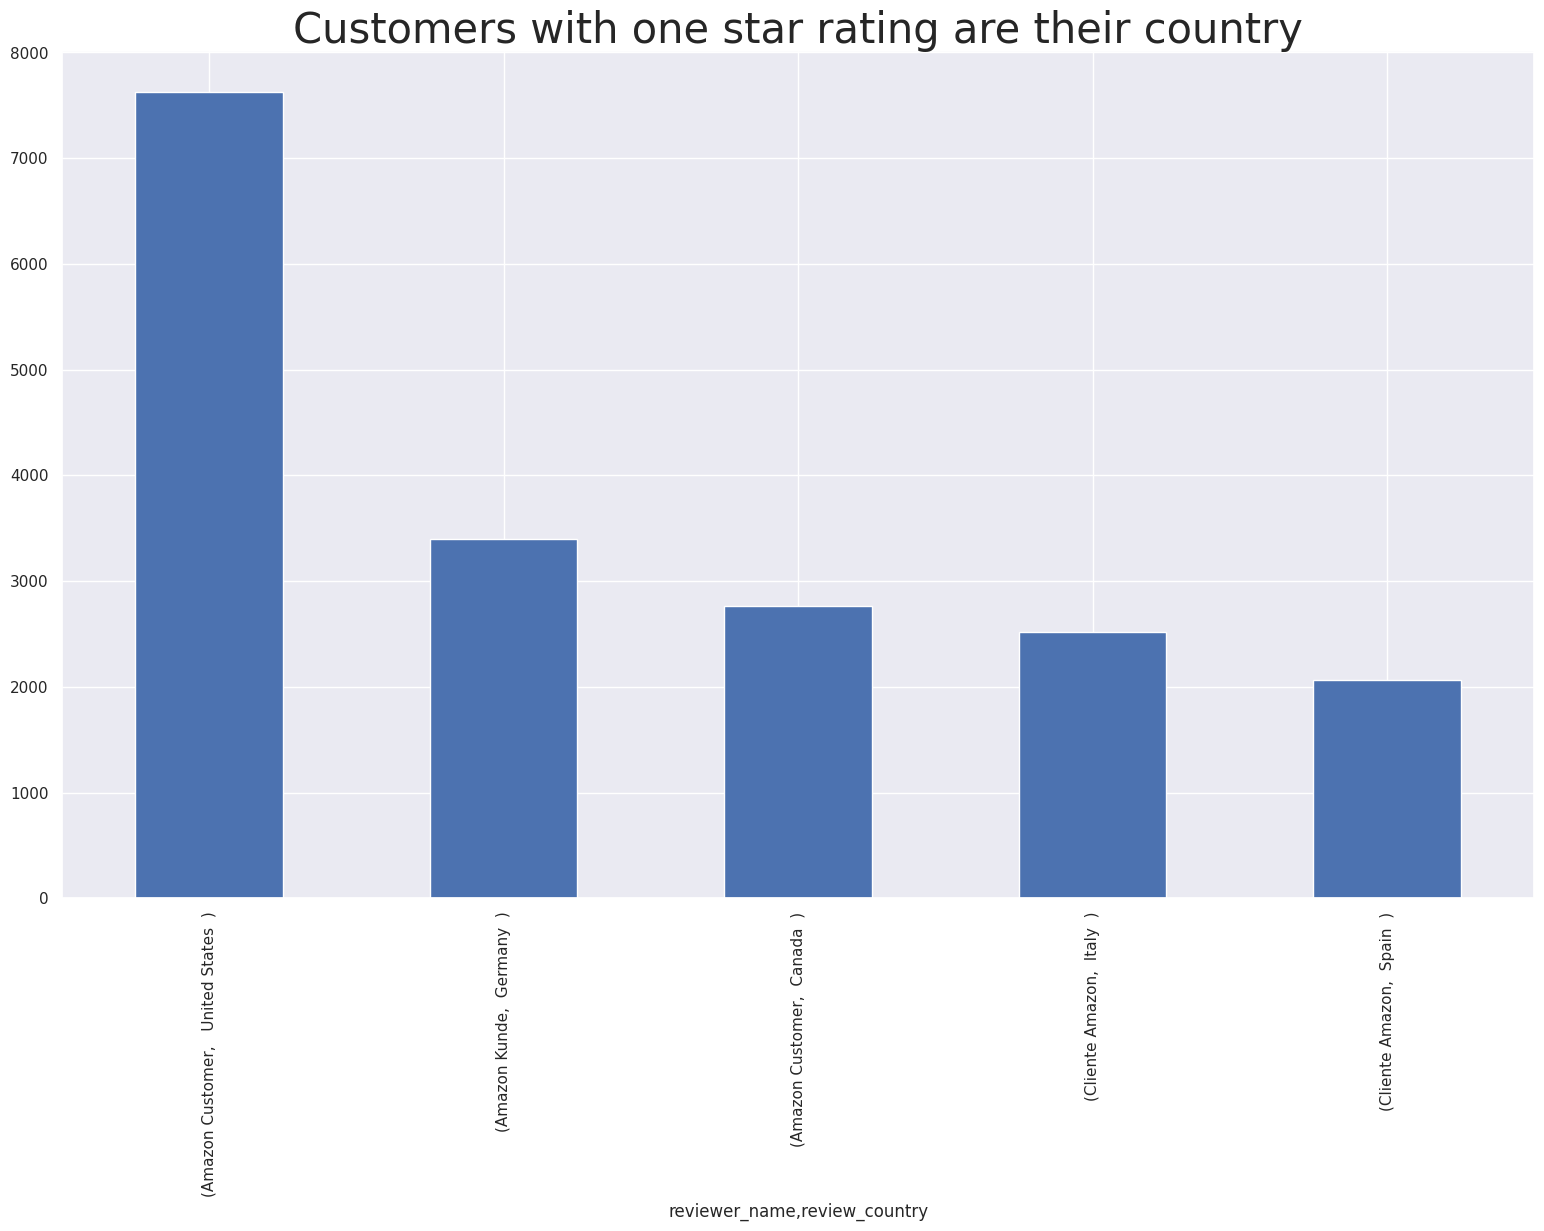

In [82]:
leastStar=amzRefined.groupby('reviewer_name',['review_rating']==1.0)['review_country'].value_counts().sort_values(ascending = False)
leastStar=leastStar.head(5)
leastStar.plot(kind='bar')
plt.title('Customers with one star rating are their country',fontsize=30)


# STEP 8: UNDERSTANDING TREND

In [83]:
trend = amzRefined.groupby('review_date').median()
trend

,review_rating,verified_purchase
review_date,,
2010-04-22,5.0,1.0
2010-05-09,5.0,1.0
2010-08-18,5.0,1.0
2010-09-17,5.0,1.0
2011-03-10,5.0,1.0
...,...,...
2021-12-16,5.0,1.0
2021-12-17,5.0,1.0
2021-12-18,5.0,1.0


Text(0, 0.5, 'mean of rating')

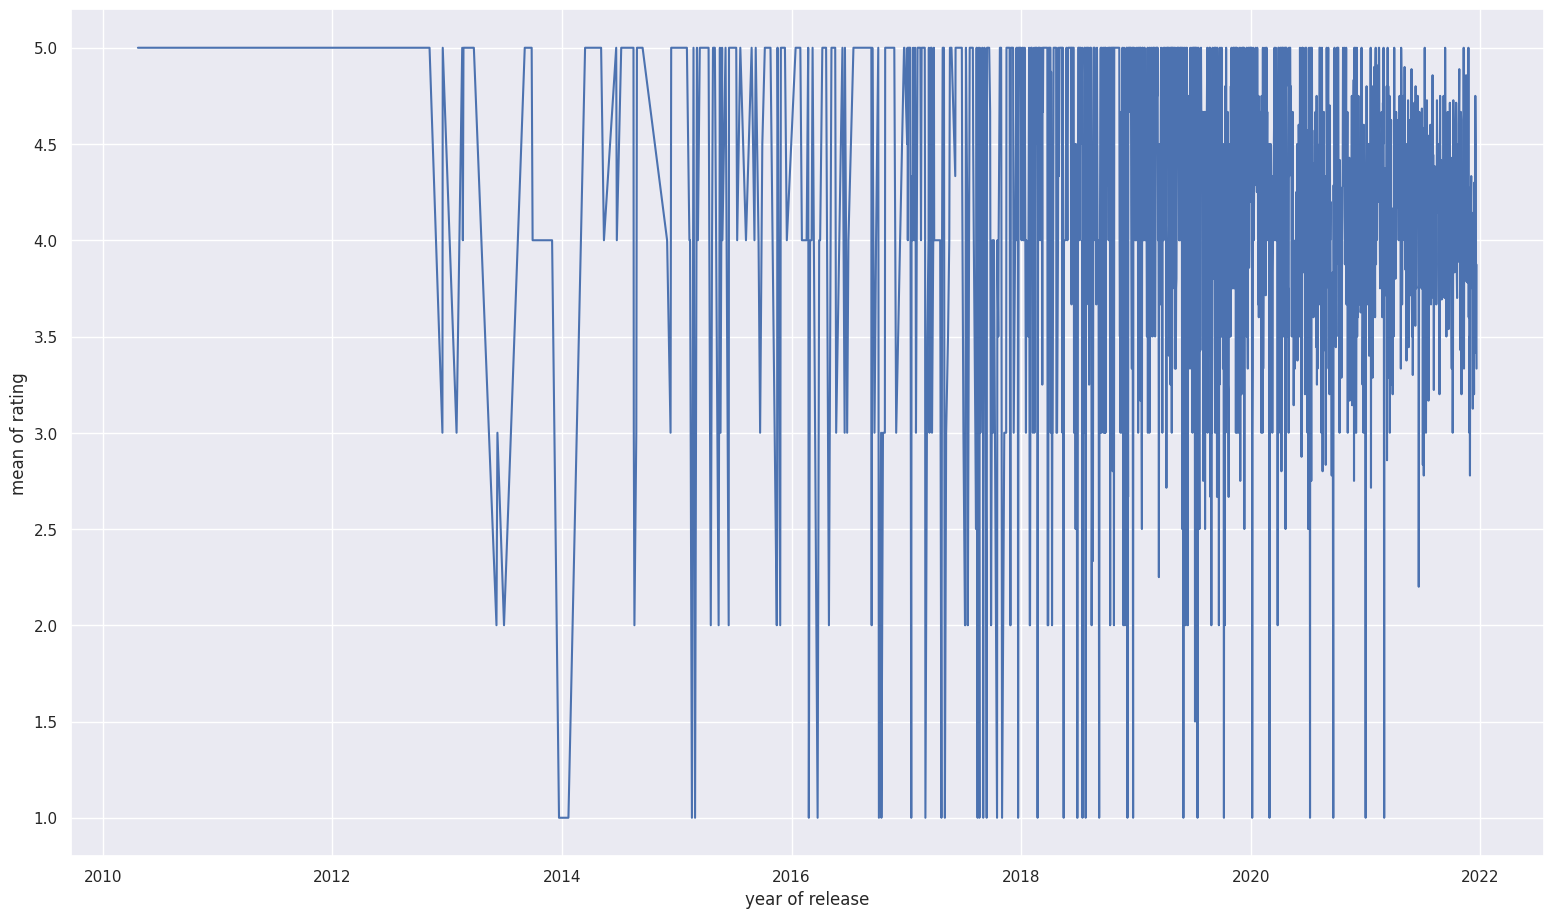

In [84]:
plt.rcParams['figure.figsize'] = (19,11)
plt.plot(trend.index,amzRefined.groupby('review_date')['review_rating'].agg(np.mean))
plt.xlabel('year of release')
plt.ylabel('mean of rating')


Visualising seasonality,trend and noisy kindness

<Figure size 4000x1600 with 0 Axes>

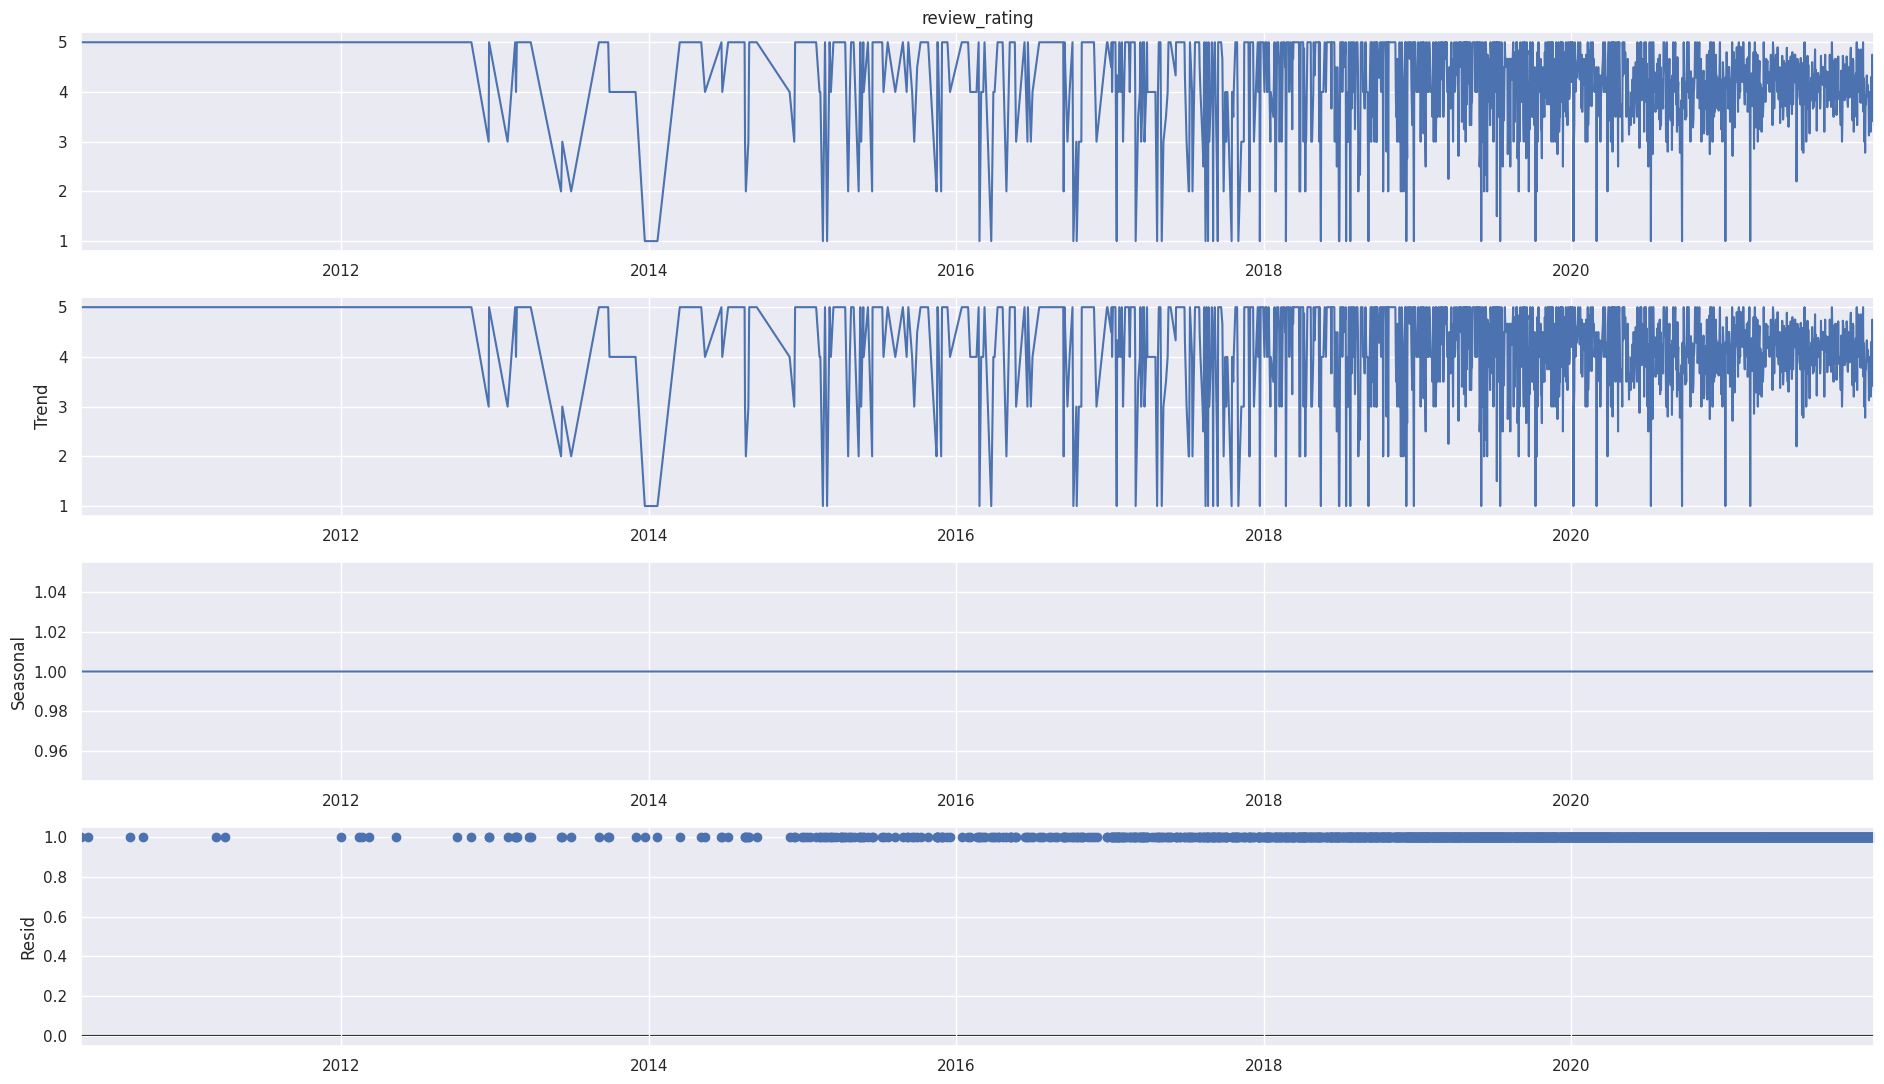

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
# To visualize the seanality & trendy & noisy kindness we utilize the seasonal_decompose()

plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result=seasonal_decompose(amzRefined.groupby('review_date')['review_rating'].agg(np.mean), model='multiplicative', period=1)
result_plot=result.plot()

# Step 9: Understanding relationship

What is the relationship between reviewer and their rating

In [86]:
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between  Reviewer name and their rating
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=amzRefined.groupby('reviewer_name')['review_rating'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1],'\nHence we reject the null hypothesis since there is relationship between the two variables')

P-Value for Anova is:  0.0 
Hence we reject the null hypothesis since there is relationship between the two variables


In [87]:
amztok = amzRefined

What is the habit of customers towards products?

# Step 9: Sentiment Analysis

In [88]:
#!pip install NLTK
import nltk
from nltk.tokenize import RegexpTokenizer

In [89]:
amztok['review_text'] = amztok['review_text'].astype(str).str.lower()

In [90]:
regexp = RegexpTokenizer('\w+')
amztok['text_token']=amztok['review_text'].apply(regexp.tokenize)
amztok.head(3)

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,scraped_at,uniq_id,review_country,text_token
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,love these. was looking for converses and thes...,5.0,1,2020-02-06,2021-12-24T02:26:25,36eae4e5-2894-5279-a0b7-d2b330e2b814,United States,"[love, these, was, looking, for, converses, an..."
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"the shoes are very cute, but after the 2nd day...",2.0,1,2021-10-28,2021-12-24T02:26:25,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,United States,"[the, shoes, are, very, cute, but, after, the,..."
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,good quality,5.0,1,2021-01-20,2021-12-24T02:26:25,db5a7525-d40b-5265-84d8-df4f29837a3b,United States,"[good, quality]"


In [91]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")


In [93]:

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [94]:
# Remove stopwords
amztok['text_token'] = amztok['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
amztok.head(3)

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,scraped_at,uniq_id,review_country,text_token
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,love these. was looking for converses and thes...,5.0,1,2020-02-06,2021-12-24T02:26:25,36eae4e5-2894-5279-a0b7-d2b330e2b814,United States,"[love, looking, converses, half, price, unique..."
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"the shoes are very cute, but after the 2nd day...",2.0,1,2021-10-28,2021-12-24T02:26:25,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,United States,"[shoes, cute, 2nd, day, wearing, tongue, start..."
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,good quality,5.0,1,2021-01-20,2021-12-24T02:26:25,db5a7525-d40b-5265-84d8-df4f29837a3b,United States,"[good, quality]"


Remove infrequent words

In [95]:
amztok['text_string'] = amztok['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [96]:
amztok[['review_text', 'text_token', 'text_string']].head()

,review_text,text_token,text_string
0,love these. was looking for converses and thes...,"[love, looking, converses, half, price, unique...",love looking converses half price unique never...
1,"the shoes are very cute, but after the 2nd day...","[shoes, cute, 2nd, day, wearing, tongue, start...",shoes cute 2nd day wearing tongue started ripp...
2,good quality,"[good, quality]",good quality
3,great,[great],great
4,ho scelto il modello bianco con rifinitura die...,"[ho, scelto, il, modello, bianco, con, rifinit...",scelto modello bianco con rifinitura dietro ne...


In [97]:
#Create a list of all words
all_words = ' '.join([word for word in amztok['text_string']])

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:

#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [100]:
#Create a frequency distribution which records the number of times each word has occurred:

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'shoes': 90440, 'shoe': 56105, 'size': 52990, 'comfortable': 40810, 'fit': 38885, 'und': 34440, 'great': 34335, 'like': 31465, 'die': 29505, 'feet': 28840, ...})

Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4), depending our dataset.

In [101]:
amztok['text_string_fdist'] = amztok['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [102]:
amztok[['review_text', 'text_token', 'text_string', 'text_string_fdist']].head()

,review_text,text_token,text_string,text_string_fdist
0,love these. was looking for converses and thes...,"[love, looking, converses, half, price, unique...",love looking converses half price unique never...,love looking converses half price unique never...
1,"the shoes are very cute, but after the 2nd day...","[shoes, cute, 2nd, day, wearing, tongue, start...",shoes cute 2nd day wearing tongue started ripp...,shoes cute 2nd day wearing tongue started ripp...
2,good quality,"[good, quality]",good quality,good quality
3,great,[great],great,great
4,ho scelto il modello bianco con rifinitura die...,"[ho, scelto, il, modello, bianco, con, rifinit...",scelto modello bianco con rifinitura dietro ne...,scelto modello bianco con rifinitura dietro ne...


<h2>Lemmatization</h2>
<h3>Next, we perfom lemmatization.</h3>

In [103]:
#Lemmatization
#Next, we perfom lemmatization.
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [104]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

amztok['text_string_lem'] = amztok['text_string_fdist'].apply(wordnet_lem.lemmatize)

Check for columnsf equality

In [105]:
# check if the columns are equal
amztok['is_equal']= (amztok['text_string_fdist']==amztok['text_string_lem'])

In [106]:
# show level count
amztok.is_equal.value_counts()

True     238595
False       210
Name: is_equal, dtype: int64

In [107]:
amztok.head(5)

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,scraped_at,uniq_id,review_country,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,love these. was looking for converses and thes...,5.0,1,2020-02-06,2021-12-24T02:26:25,36eae4e5-2894-5279-a0b7-d2b330e2b814,United States,"[love, looking, converses, half, price, unique...",love looking converses half price unique never...,love looking converses half price unique never...,love looking converses half price unique never...,True
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"the shoes are very cute, but after the 2nd day...",2.0,1,2021-10-28,2021-12-24T02:26:25,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,United States,"[shoes, cute, 2nd, day, wearing, tongue, start...",shoes cute 2nd day wearing tongue started ripp...,shoes cute 2nd day wearing tongue started ripp...,shoes cute 2nd day wearing tongue started ripp...,True
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,good quality,5.0,1,2021-01-20,2021-12-24T02:26:25,db5a7525-d40b-5265-84d8-df4f29837a3b,United States,"[good, quality]",good quality,good quality,good quality,True
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,great,5.0,1,2021-04-22,2021-12-24T02:26:25,75a42851-6462-54b5-988a-27d336221943,United States,[great],great,great,great,True
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,ho scelto il modello bianco con rifinitura die...,5.0,1,2021-02-04,2021-12-24T02:26:25,232dee43-849e-5d06-ba05-efb3f4814714,Italy,"[ho, scelto, il, modello, bianco, con, rifinit...",scelto modello bianco con rifinitura dietro ne...,scelto modello bianco con rifinitura dietro ne...,scelto modello bianco con rifinitura dietro ne...,True


# Word cloud

In [108]:
all_words_lem = ' '.join([word for word in amztok['text_string_lem']])

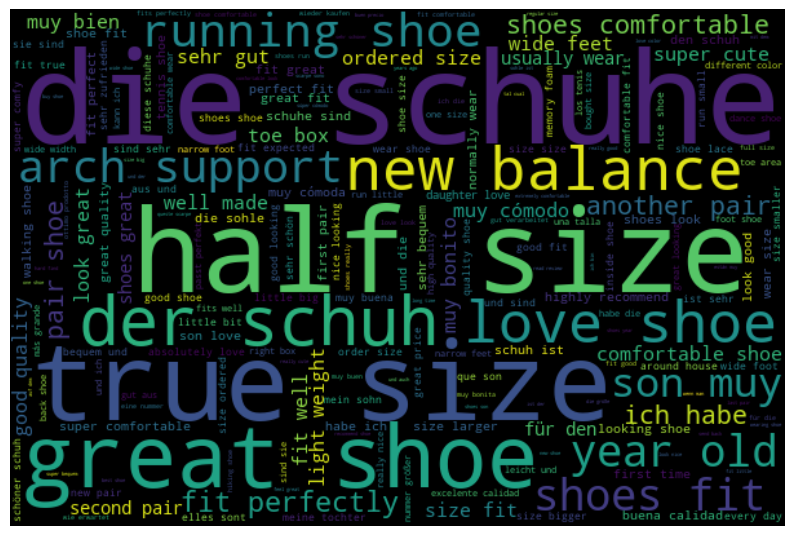

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Alternative Style

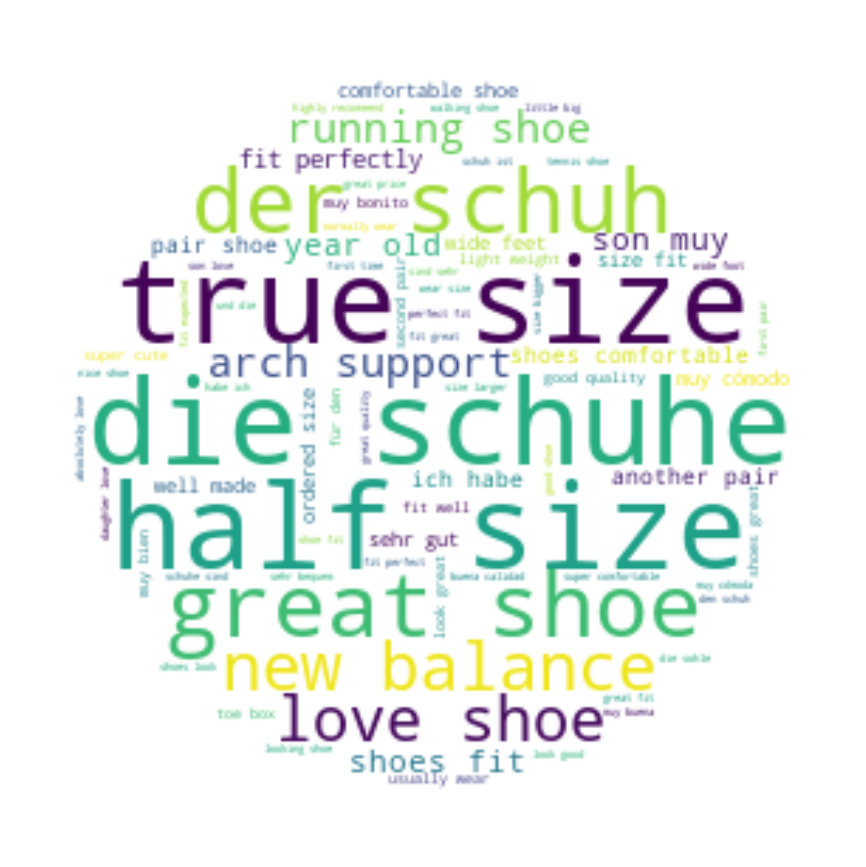

In [110]:
#Different style:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

Frequency distribution

In [111]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [ ]:
#Most Common Words

In [ ]:
#Most common words
fd.most_common(5)

In [ ]:
fd.tabulate(5)

Plot common words

In [ ]:
#Plot common words
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

In [ ]:
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [ ]:
#!pip install plotly.express

In [ ]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

Search for a specifid word

In [ ]:
#Search specific words
# Show frequency of a specific word
fd["shoes"]

# Sentiment Analysis

VADER lexicon
NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

In [ ]:
nltk.download('vader_lexicon')

<h3>Sentiment</h3>
Sentiment Intensity Analyzer
Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:

In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

Polarity scores
Use the polarity_scores method:

In [ ]:
amztok['polarity'] = amztok['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
amztok.tail(3)

In [ ]:
amzset = amztok.copy()

Tranaform the data

In [ ]:
#Transform data
# Change data structure
amzset = pd.concat(
    [amzset.drop(['verified_purchase','scraped_at', 'uniq_id', 'polarity'], axis=1), 
     amzset['polarity'].apply(pd.Series)], axis=1)
amzset.head(3)

# Create new variable with sentiment "neutral," "positive" and "negative"


In [ ]:
# Create new variable with sentiment "neutral," "positive" and "negative"
amzset['sentiment'] = amzset['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
amzset.head(4)

<h3>Analyze data</h3><br>
Tweet with highest positive sentiment


In [ ]:
#Analyze data
# Tweet with highest positive sentiment
amzset.loc[amzset['compound'].idxmax()].values

Tweet with highest negative sentiment 
 ...seems to be a case of wrong classification because of the word "deficit"

In [ ]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
amzset.loc[amzset['compound'].idxmin()].values

Visualize the data

In [ ]:
#Visualize data
# Number of tweets 
sns.countplot(y='sentiment', 
             data=amzset, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

Lineplot

In [ ]:
# Lineplot
g = sns.lineplot(x='review_date', y='compound', data=amzset)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

Box plot

In [ ]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=amzset);

# Step 10: Write the results back to the database.

In [ ]:
review_analysed = amzset

In [ ]:
review_analysed.to_csv('review_analysed.csv')

In [ ]:
review_analysed.columns

In [ ]:
from pathlib import Path

In [ ]:
Path('ukshoes.db').touch()

In [ ]:
conn1 = sqlite3.connect('ukshoes.db')
c1 = conn1.cursor()

In [ ]:
c1.execute('''drop table if exists analysed_shoes''')

In [ ]:
c1.execute('''create table analysed_shoes(product_name varchar, reviewer_name varchar, review_title varchar,review_text varchar, review_rating float,
            review_date datetime, review_country text, text_token text, text_string text,text_string_fdist text, text_string_lem text, is_equal float, neg float,
            pos float, compound float,setiment int )''',conn)

review_analysed = pd.read_csv('/storage/emulated/0/db_pro/review_analysed.csv')
review_analysed.to_sql('review_analysed', conn, if_exists ='append', index = False)

In [ ]:
c1.execute('''select *
from
analysed_shoes''')
c1.fetchall()

# <h1>The Final Report</h1>


From our Analysis 73% of customers were postive towards purchase of shoes via Amazon platform. . 25% had negative setiment towards procuremt of product while the remaining were neutral. Among others, USA is the highest rating country with 5 star review and 1 star review. Despite that, There is a good setiment towards the utilized,product, yet there is a need to improve on production line and customer relationship to keep customers focus towards Amazon company.